In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import peakutils
from util.FreqReader import read_freq
from util.DoubleAnharmonicity import DoubleAnharmonicity


plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['figure.dpi'] = 200

In [2]:
def do_anharmonism_correction(x, coef1, coef2):
    if 1000 < x < 2000:
       return x * coef1
    elif 2000 < x:
      return x * coef2

In [3]:
b = read_freq("bacteriochlorophyll/b_far_1_freq_ir.txt")
b_3water = read_freq("bacteriochlorophyll/b_far_3w_2_freq_ir.txt")
b_3methanol = read_freq("bacteriochlorophyll/b_far_1_3metanol_freq_ir.txt")
b_3ethanol = read_freq("bacteriochlorophyll/b_far_2_3Etanol_freq_ir.txt")
b_3isopropanol = read_freq("bacteriochlorophyll/b_far_1_3Isopropanol_freq_ir.txt")
b_4water = read_freq("bacteriochlorophyll/b_far_4w_1_freq_ir.txt")
b_4methanol = read_freq("bacteriochlorophyll/b_far_1_4metanol_freq_ir.txt")
b_4ethanol = read_freq("bacteriochlorophyll/b_far_4Etanol_1_freq_ir.txt")
b_4isopropanol = read_freq("bacteriochlorophyll/b_far_2_4Isopropanol_freq_ir.txt")



In [4]:
def plot_all(dfs,legends, coef1=1, coef2=1, y_shift=0, showPeaks=False, forcedFirstPeaks=True):
    i = 0
    for df in dfs:
        x = df['X'].map(lambda x: do_anharmonism_correction(x, coef1, coef2))
        y = df['Y']
        plt.plot(x, y+i*y_shift, '-', lw=1, alpha=1)

        i = i+1
    
    i = 0
    if showPeaks or forcedFirstPeaks: 
        for df in dfs:
            x = df['X'].map(lambda x: do_anharmonism_correction(x, coef1, coef2))
            y = df['Y']
            peaks = peakutils.indexes(y, thres=0.01, min_dist=1)
            for peak in peaks:
                if x[peak] > 2000:
                    plt.text(x[peak], y[peak]+50+i*y_shift, int(x[peak]), horizontalalignment='center', color='black')
            plt.plot(x[peaks], y[peaks]+i*y_shift, 'black', marker="o", ls="", ms=5)
            i = i+1
            if not showPeaks:
                break
    i = 0
    for df in dfs:
        x = df['X'].map(lambda x: do_anharmonism_correction(x, coef1, coef2))
        y = df['Y']
        peaks = peakutils.indexes(y, thres=0.01, min_dist=1)
        plt.plot(x[peaks], y[peaks]+i*y_shift, marker="o", ls="", ms=5)

        i = i+1
    plt.legend(legends, title='coef1=' + str(coef1) + ";" + "coef2=" + str(coef2))
    plt.xlabel(xlabel="cm^-1")
    ax = plt.gca()
    ax.get_yaxis().set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

    

In [5]:
def plot_all_short(dfs,legends, coef1=1, coef2=1, y_shift=0, showPeaks=False, forcedFirstPeaks=True):
    tempDfs = []
    for df in dfs:
        tempDfs.append(df.drop(df[df.X < 2850].index))

    dfs = tempDfs
    i = 0
    for df in dfs:
        x = df['X'].map(lambda x: do_anharmonism_correction(x, coef1, coef2))
        y = df['Y']
        plt.plot(x, y+i*y_shift, '-', lw=1, alpha=1)

        i = i+1
    
    i = 0
    if showPeaks or forcedFirstPeaks: 
        for df in dfs:
            x = df['X'].map(lambda x: do_anharmonism_correction(x, coef1, coef2))
            y = df['Y']
            peaks = peakutils.indexes(y, thres=0.01, min_dist=1)
            for peak in peaks:
                if x.iloc[peak] > 3200:
                    plt.text(x.iloc[peak], y.iloc[peak]+50+i*y_shift, int(x.iloc[peak]), horizontalalignment='center', color='black')
            plt.plot(x.iloc[peaks], y.iloc[peaks]+i*y_shift, 'black', marker="o", ls="", ms=5)
            i = i+1
            if not showPeaks:
                break
    i = 0
    for df in dfs:
        x = df['X'].map(lambda x: do_anharmonism_correction(x, coef1, coef2))
        y = df['Y']
        peaks = peakutils.indexes(y, thres=0.01, min_dist=1)
        plt.plot(x.iloc[peaks], y.iloc[peaks]+i*y_shift, marker="o", ls="", ms=5)

        i = i+1
    plt.legend(legends, title='coef1=' + str(coef1) + ";" + "coef2=" + str(coef2))
    plt.xlabel(xlabel="cm^-1")
    ax = plt.gca()
    ax.get_yaxis().set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)



In [6]:
def plot_all_ultra_short(dfs, legends, coef1=1, coef2=1, y_shift=0, showPeaks=False, forcedFirstPeaks=True):
    tempDfs = []
    for df in dfs:
        tempDfs.append(df.drop(df[df.X < 3400].index))

    dfs = tempDfs
    i = 0
    for df in dfs:
        x = df['X'].map(lambda x: do_anharmonism_correction(x, coef1, coef2))
        y = df['Y']
        plt.plot(x, y+i*y_shift, '-', lw=1, alpha=1)

        i = i+1
    
    i = 0
    if showPeaks or forcedFirstPeaks: 
        for df in dfs:
            x = df['X'].map(lambda x: do_anharmonism_correction(x, coef1, coef2))
            y = df['Y']
            peaks = peakutils.indexes(y, thres=0.01, min_dist=1)
            for peak in peaks:
                if x.iloc[peak] > 3200:
                    plt.text(x.iloc[peak], y.iloc[peak]+50+i*y_shift, int(x.iloc[peak]), horizontalalignment='center', color='black')
            plt.plot(x.iloc[peaks], y.iloc[peaks]+i*y_shift, 'black', marker="o", ls="", ms=5)
            i = i+1
            if not showPeaks:
                break
    i = 0
    for df in dfs:
        x = df['X'].map(lambda x: do_anharmonism_correction(x, coef1, coef2))
        y = df['Y']
        peaks = peakutils.indexes(y, thres=0.01, min_dist=1)
        plt.plot(x.iloc[peaks], y.iloc[peaks]+i*y_shift, marker="o", ls="", ms=5)

        i = i+1
    plt.legend(legends, title='coef1=' + str(coef1) + ";" + "coef2=" + str(coef2))
    plt.xlabel(xlabel="cm^-1")
    ax = plt.gca()
    ax.get_yaxis().set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

In [7]:
coef1=0.97
coef2=0.95

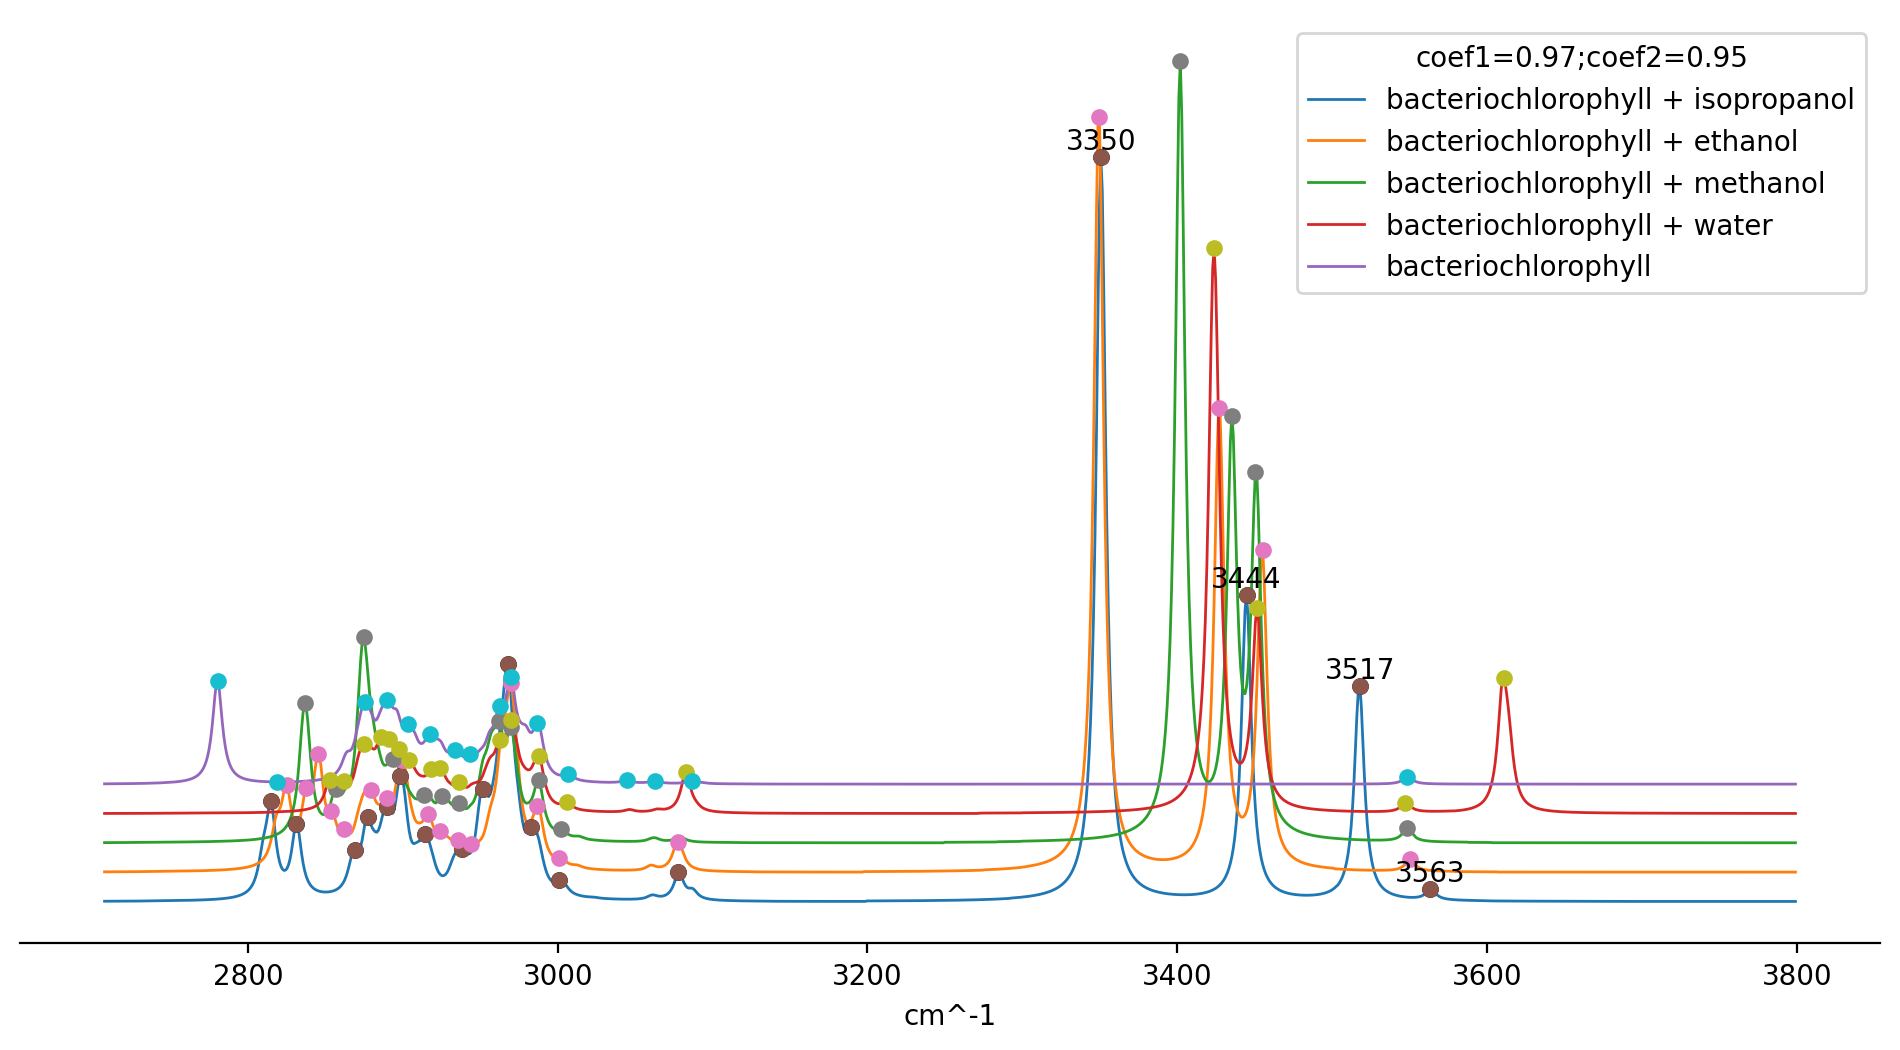

In [8]:
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 200
plot_all_short([b_3isopropanol, b_3ethanol, b_3methanol, b_3water, b],
          ['bacteriochlorophyll + isopropanol', 'bacteriochlorophyll + ethanol', 'bacteriochlorophyll + methanol', 'bacteriochlorophyll + water', 'bacteriochlorophyll'],
          coef1=coef1, coef2=coef2, y_shift=200, showPeaks=False, forcedFirstPeaks=True)

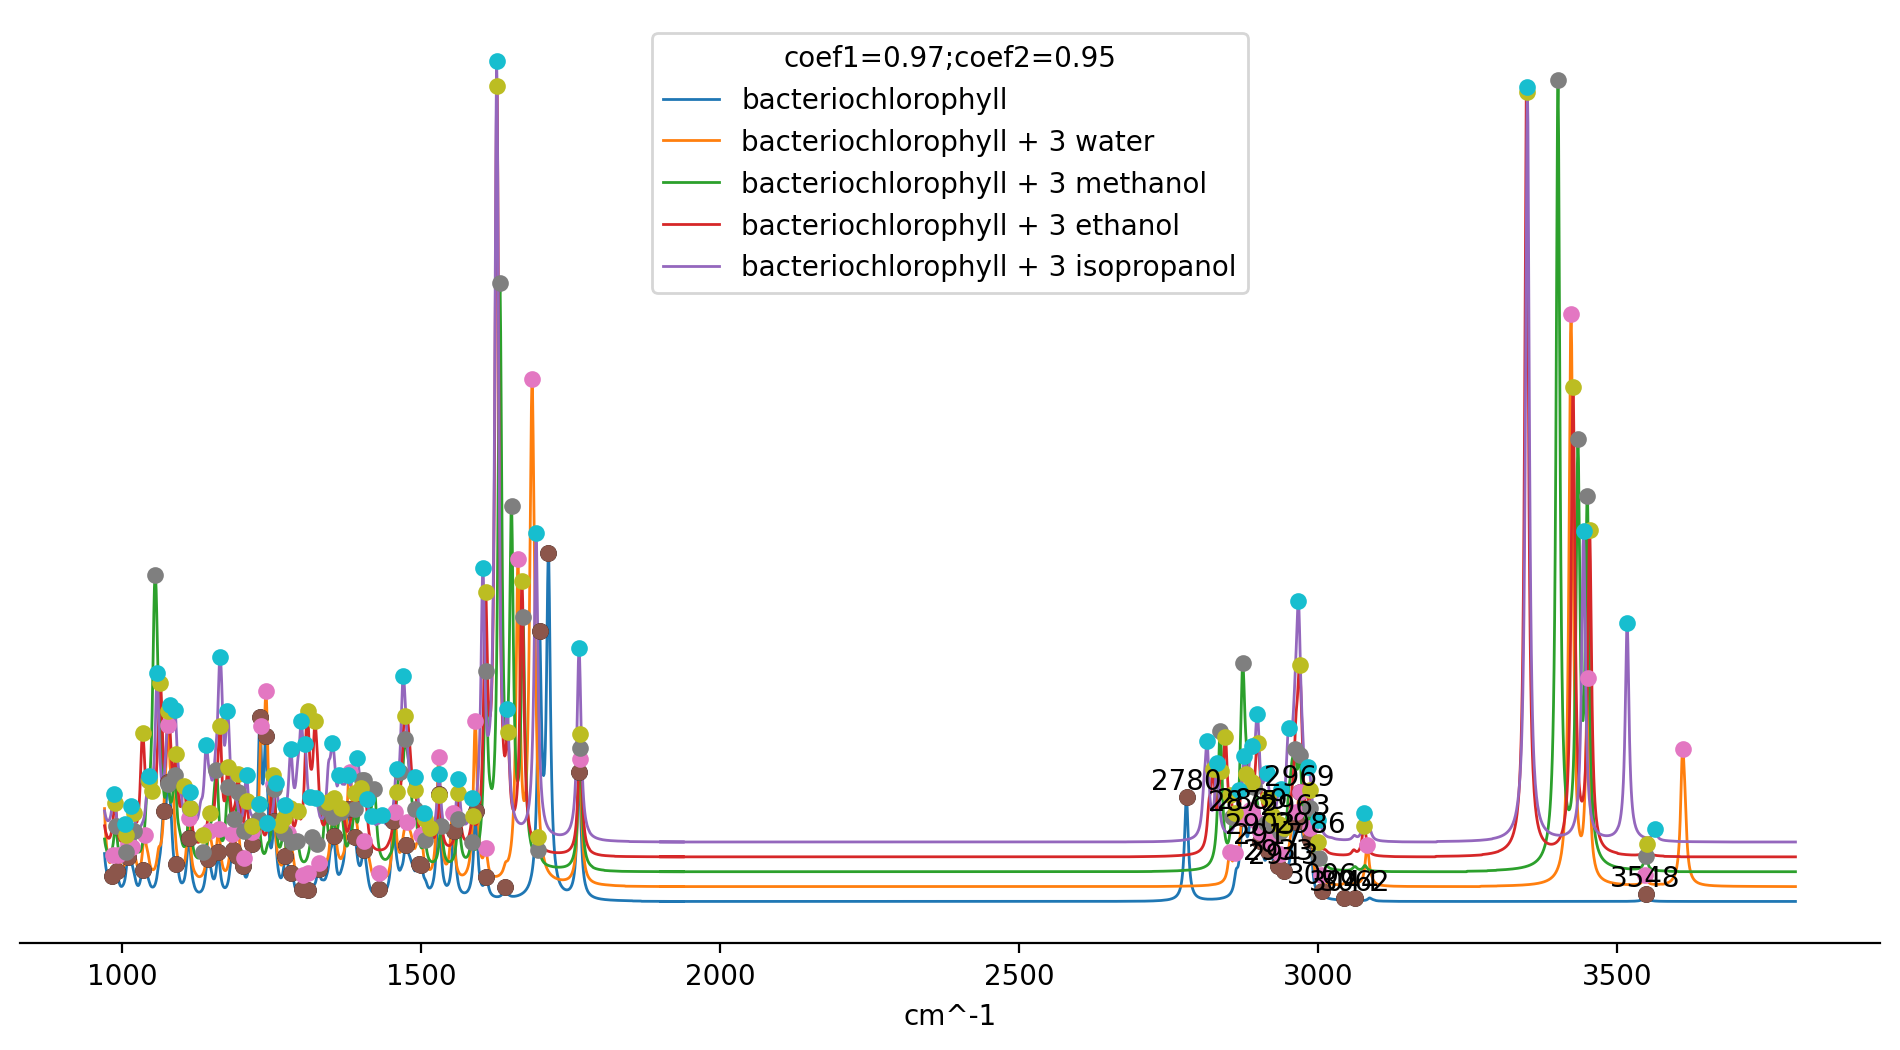

In [9]:

plot_all([b, b_3water, b_3methanol, b_3ethanol, b_3isopropanol],
          ['bacteriochlorophyll', 'bacteriochlorophyll + 3 water', 'bacteriochlorophyll + 3 methanol', 'bacteriochlorophyll + 3 ethanol', 'bacteriochlorophyll + 3 isopropanol'], 
          coef1=coef1, coef2=coef2, y_shift=100, showPeaks=False)

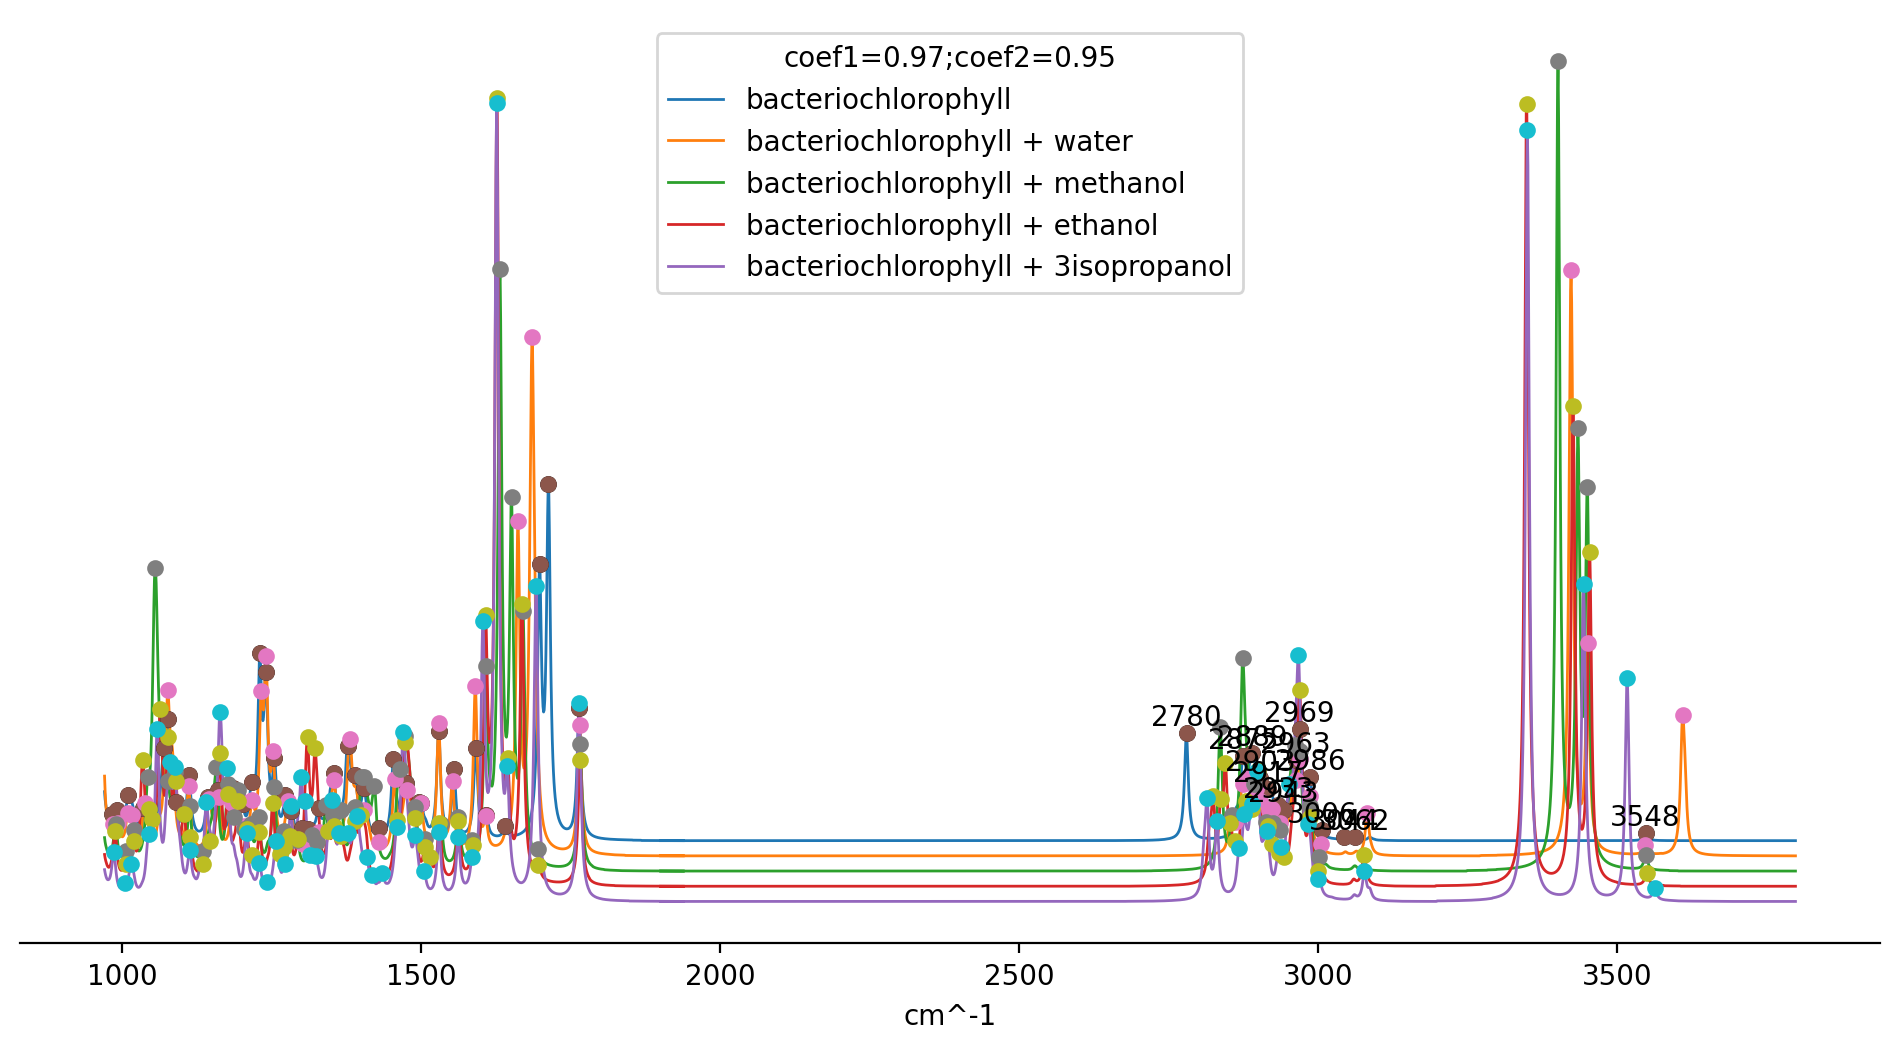

In [10]:
plot_all([b, b_3water, b_3methanol, b_3ethanol, b_3isopropanol],
          ['bacteriochlorophyll', 'bacteriochlorophyll + water', 'bacteriochlorophyll + methanol', 'bacteriochlorophyll + ethanol', 'bacteriochlorophyll + 3isopropanol'],
          coef1=coef1, coef2=coef2, y_shift=-100)

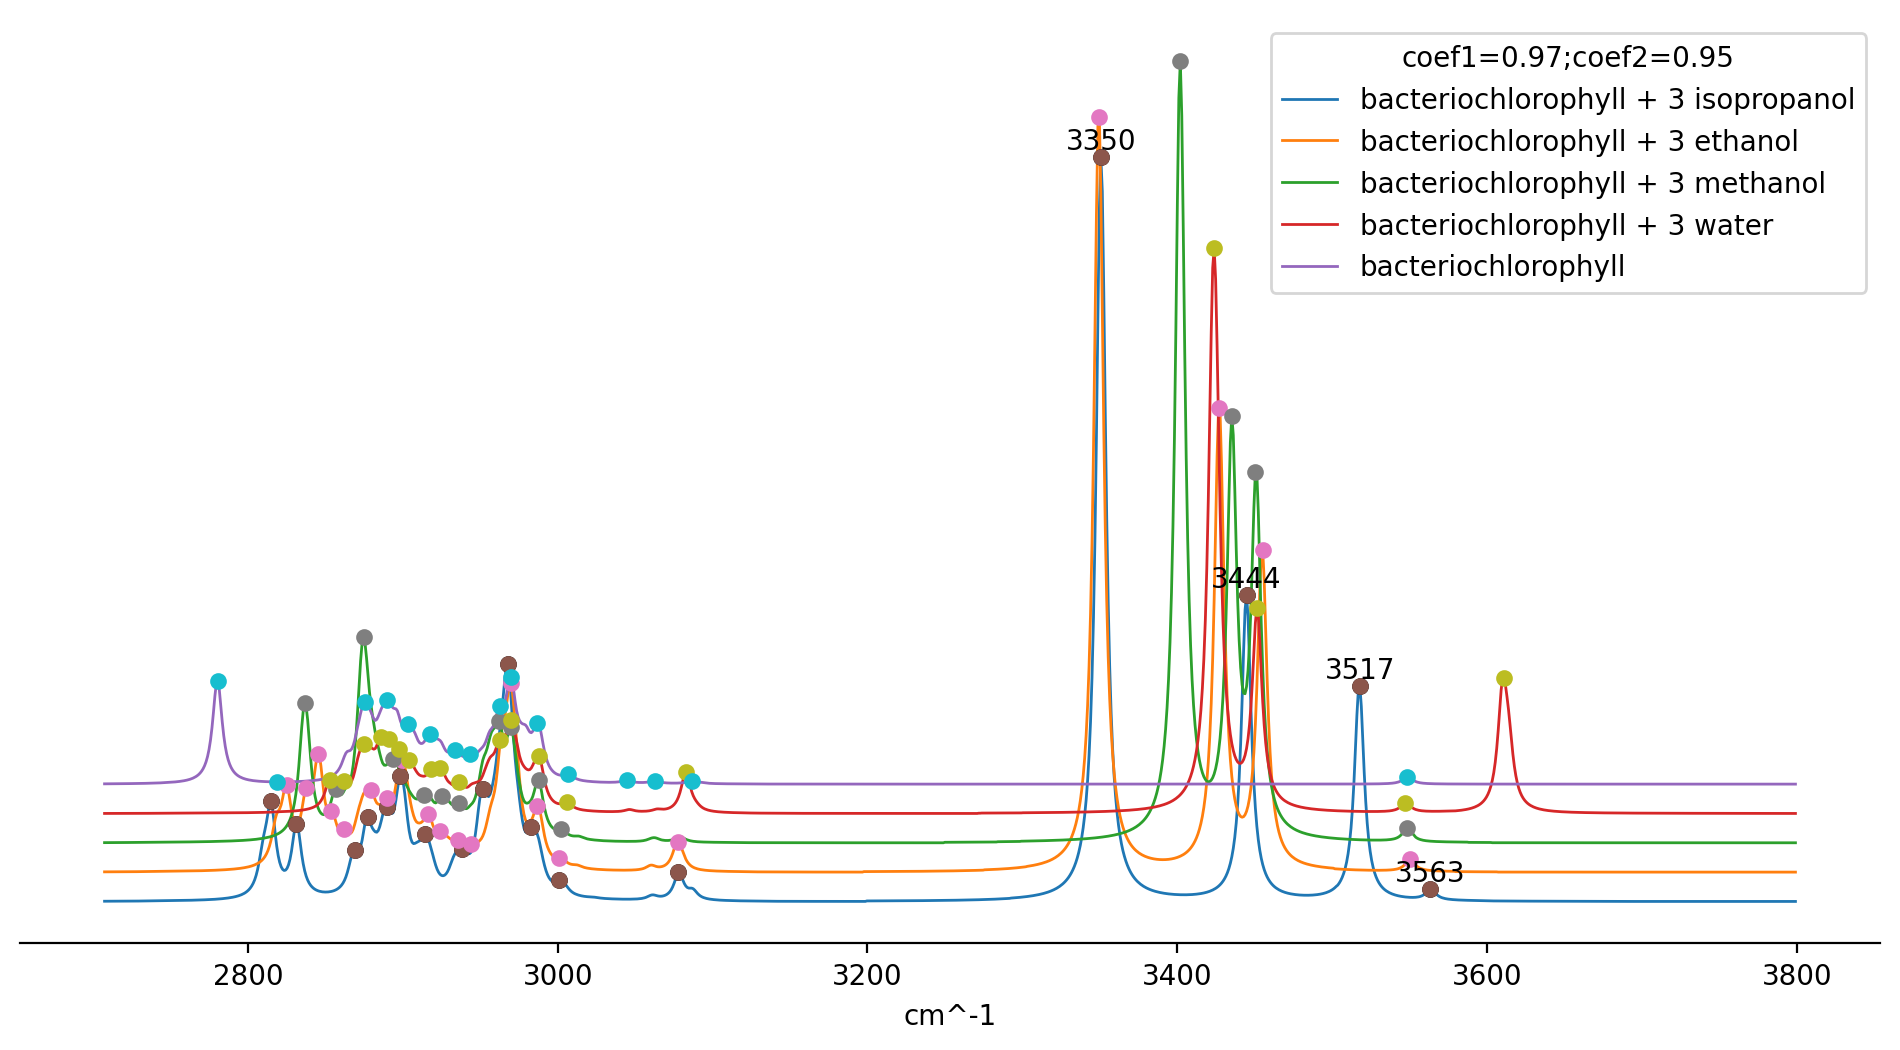

In [11]:
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 200
plot_all_short([b_3isopropanol, b_3ethanol, b_3methanol, b_3water, b],
          ['bacteriochlorophyll + 3 isopropanol', 'bacteriochlorophyll + 3 ethanol', 'bacteriochlorophyll + 3 methanol', 'bacteriochlorophyll + 3 water', 'bacteriochlorophyll'],
          coef1=coef1, coef2=coef2, y_shift=200, showPeaks=False, forcedFirstPeaks=True)

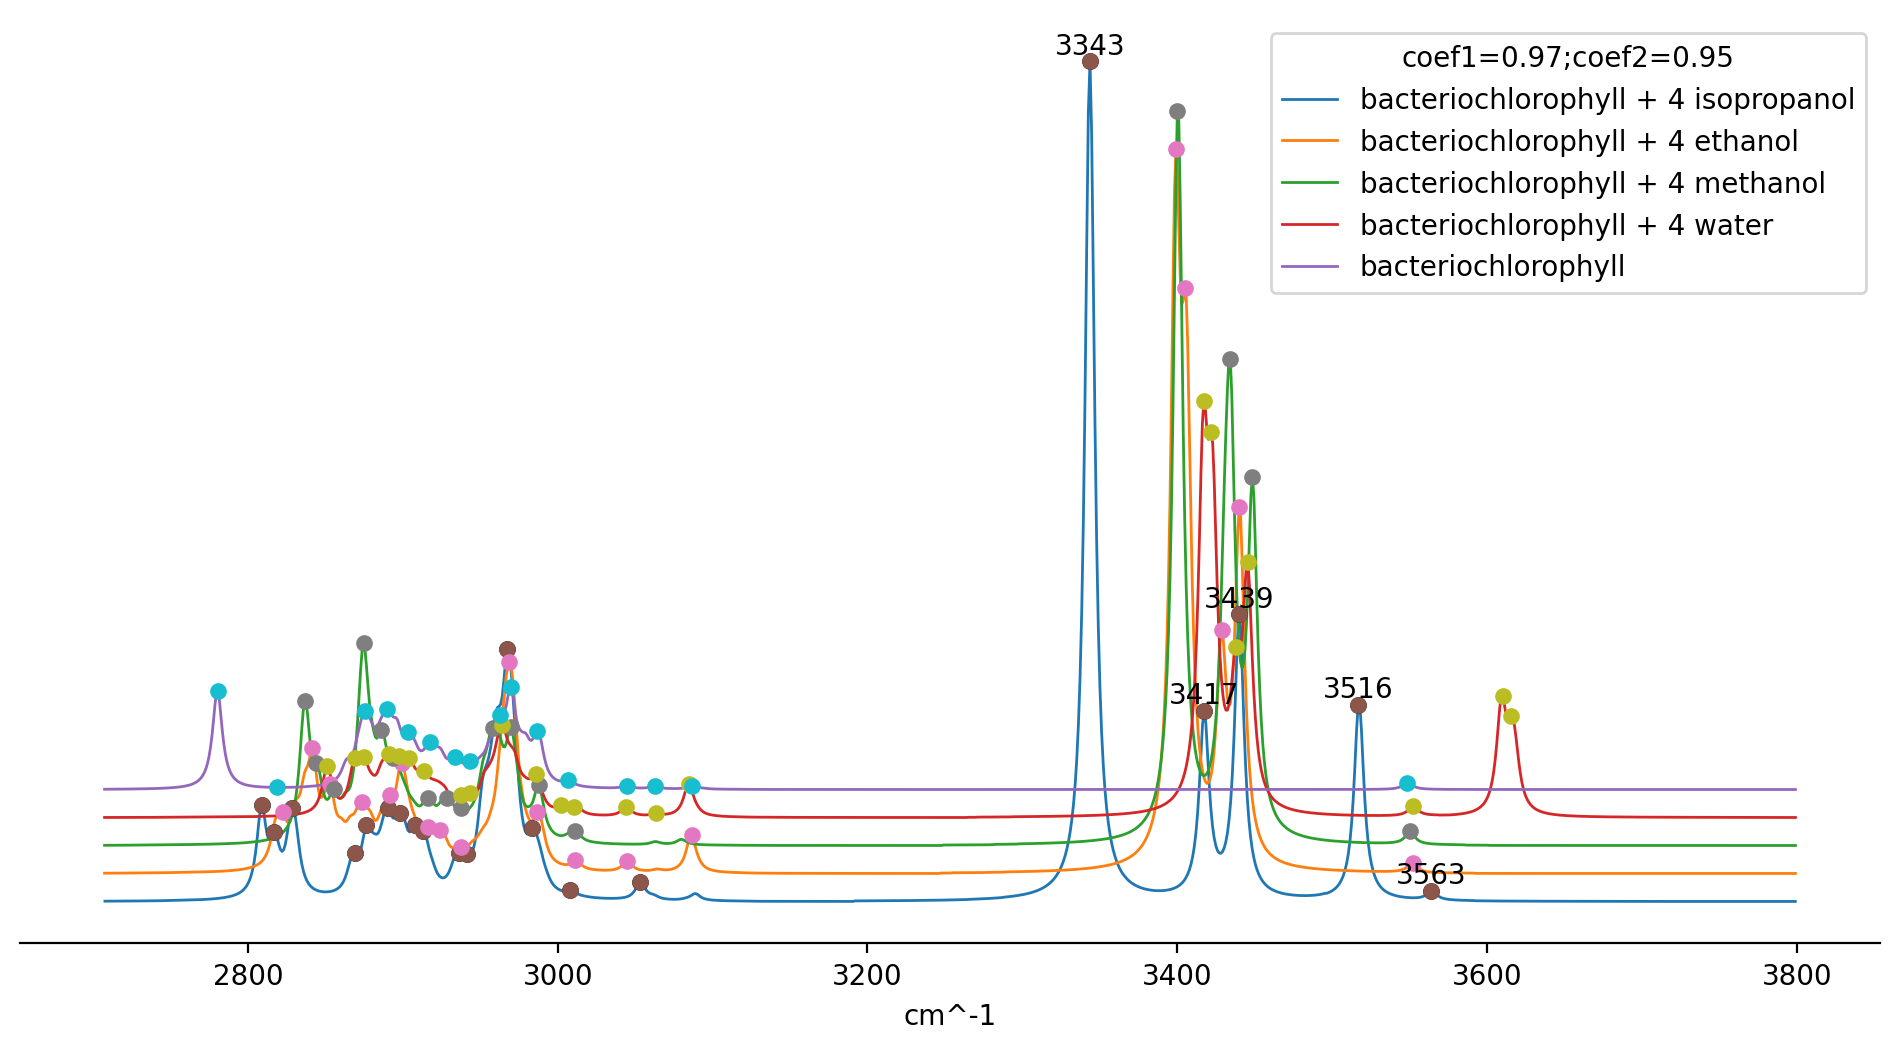

In [12]:
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 200
plot_all_short([b_4isopropanol, b_4ethanol, b_4methanol, b_4water, b],
          ['bacteriochlorophyll + 4 isopropanol', 'bacteriochlorophyll + 4 ethanol', 'bacteriochlorophyll + 4 methanol', 'bacteriochlorophyll + 4 water', 'bacteriochlorophyll'],
          coef1=coef1, coef2=coef2, y_shift=200, showPeaks=False, forcedFirstPeaks=True)

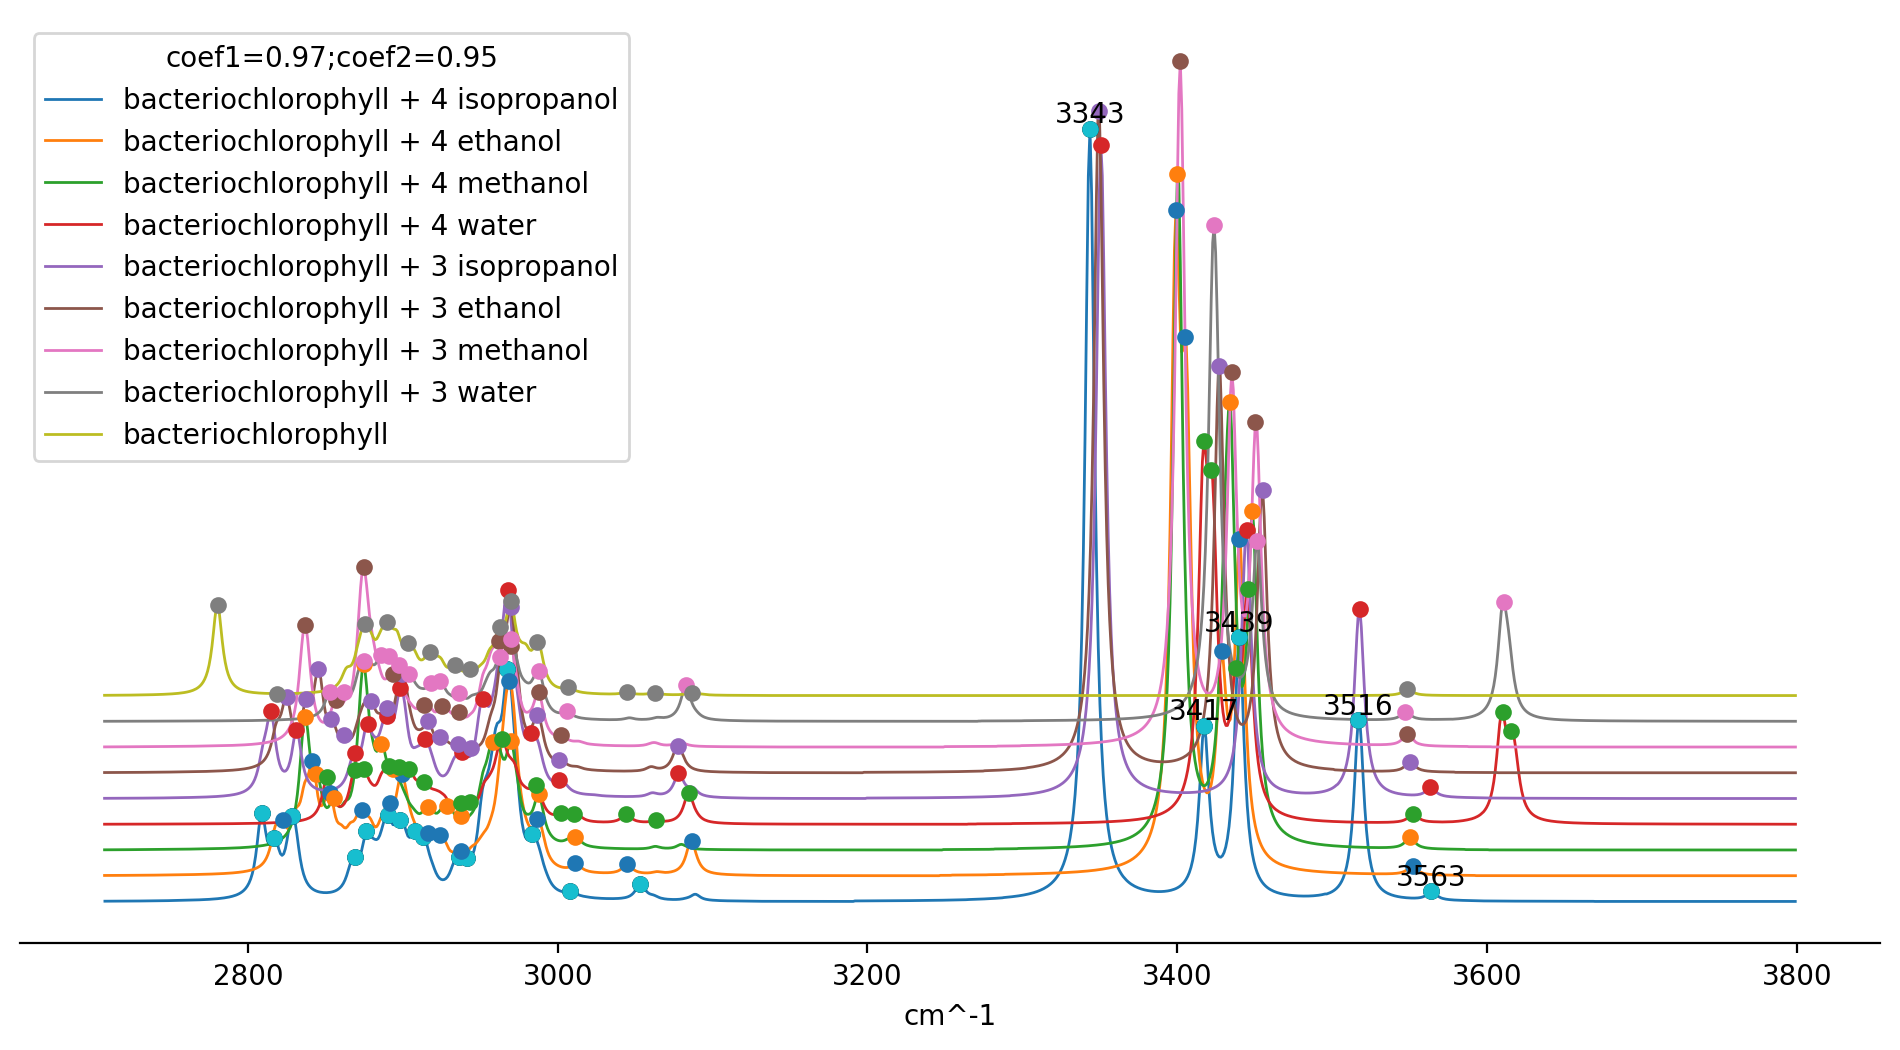

In [13]:
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 200
plot_all_short([b_4isopropanol, b_4ethanol, b_4methanol, b_4water, b_3isopropanol, b_3ethanol, b_3methanol, b_3water, b],
          ['bacteriochlorophyll + 4 isopropanol',
           'bacteriochlorophyll + 4 ethanol',
           'bacteriochlorophyll + 4 methanol',
           'bacteriochlorophyll + 4 water',
           'bacteriochlorophyll + 3 isopropanol',
           'bacteriochlorophyll + 3 ethanol',
           'bacteriochlorophyll + 3 methanol',
           'bacteriochlorophyll + 3 water',
           'bacteriochlorophyll'],
          coef1=coef1, coef2=coef2, y_shift=200, showPeaks=False, forcedFirstPeaks=True)

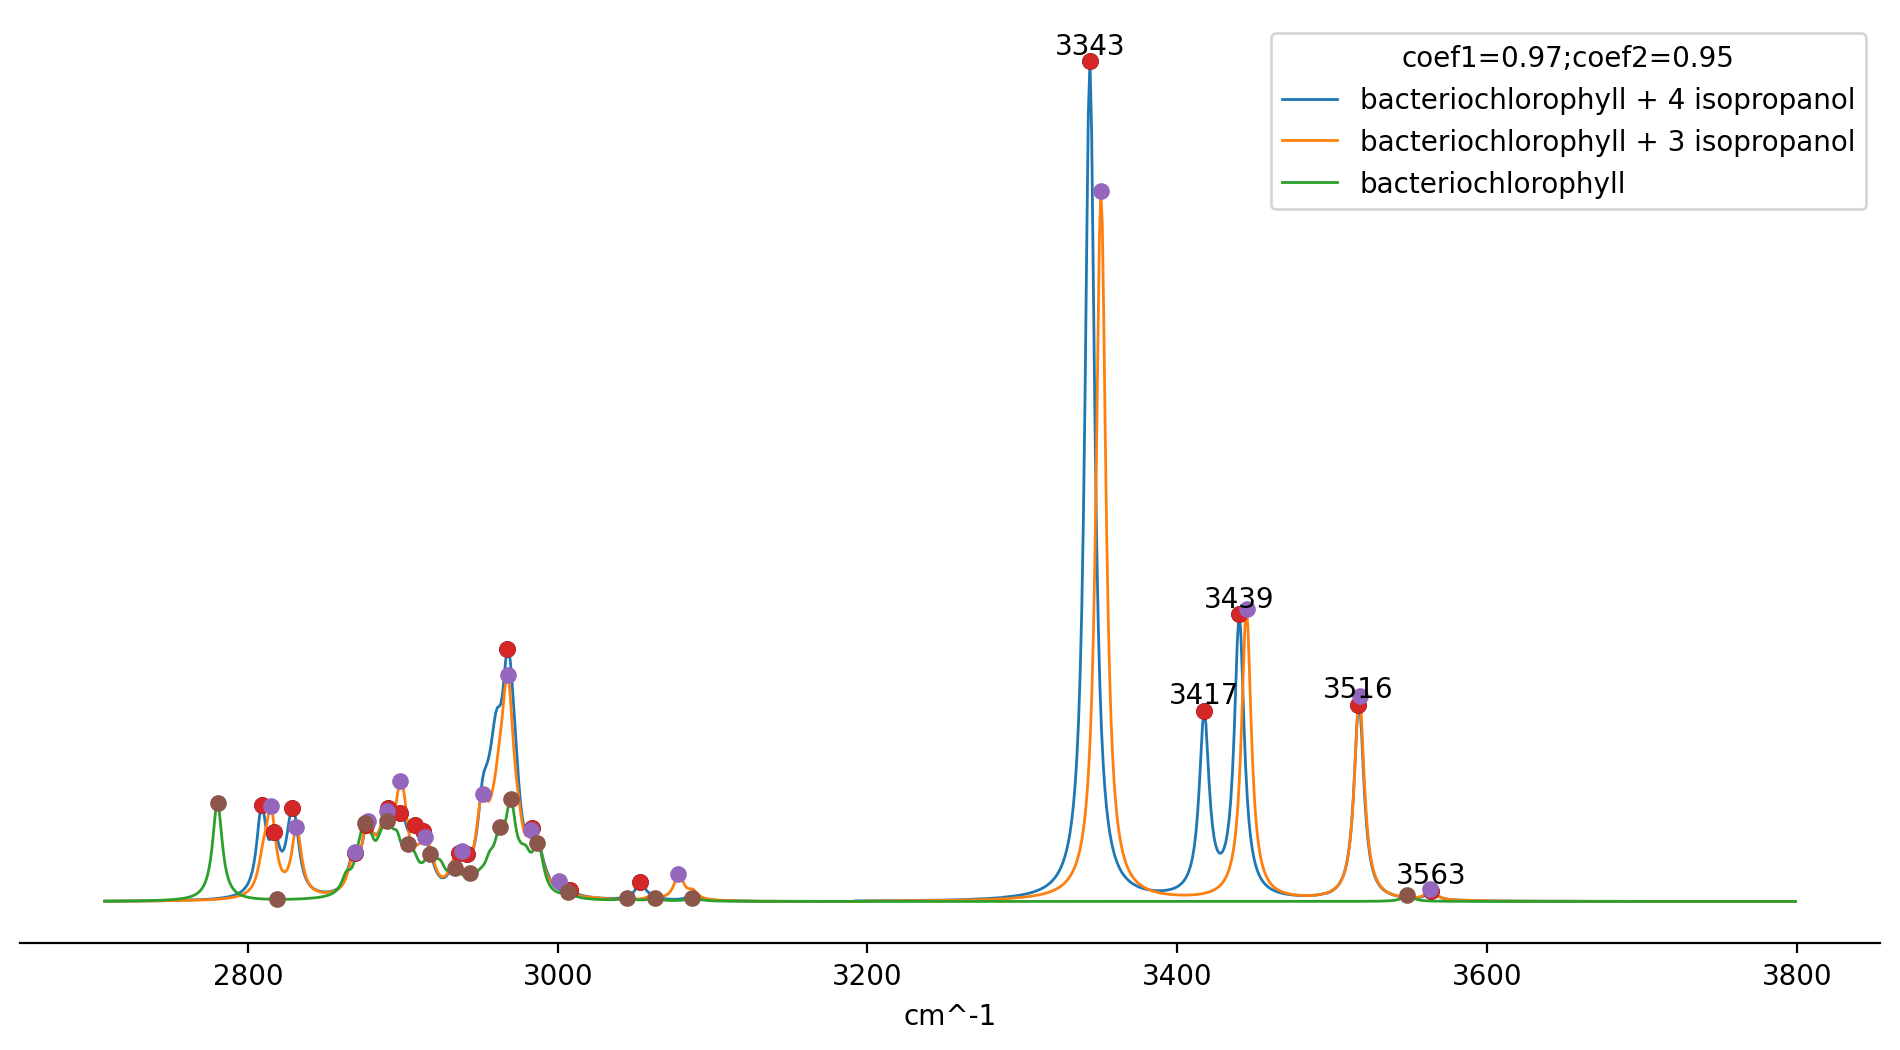

In [14]:
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 200
plot_all_short([b_4isopropanol, b_3isopropanol, b],
          ['bacteriochlorophyll + 4 isopropanol',
           'bacteriochlorophyll + 3 isopropanol',
           'bacteriochlorophyll'],
          coef1=coef1, coef2=coef2, y_shift=0, showPeaks=False, forcedFirstPeaks=True)


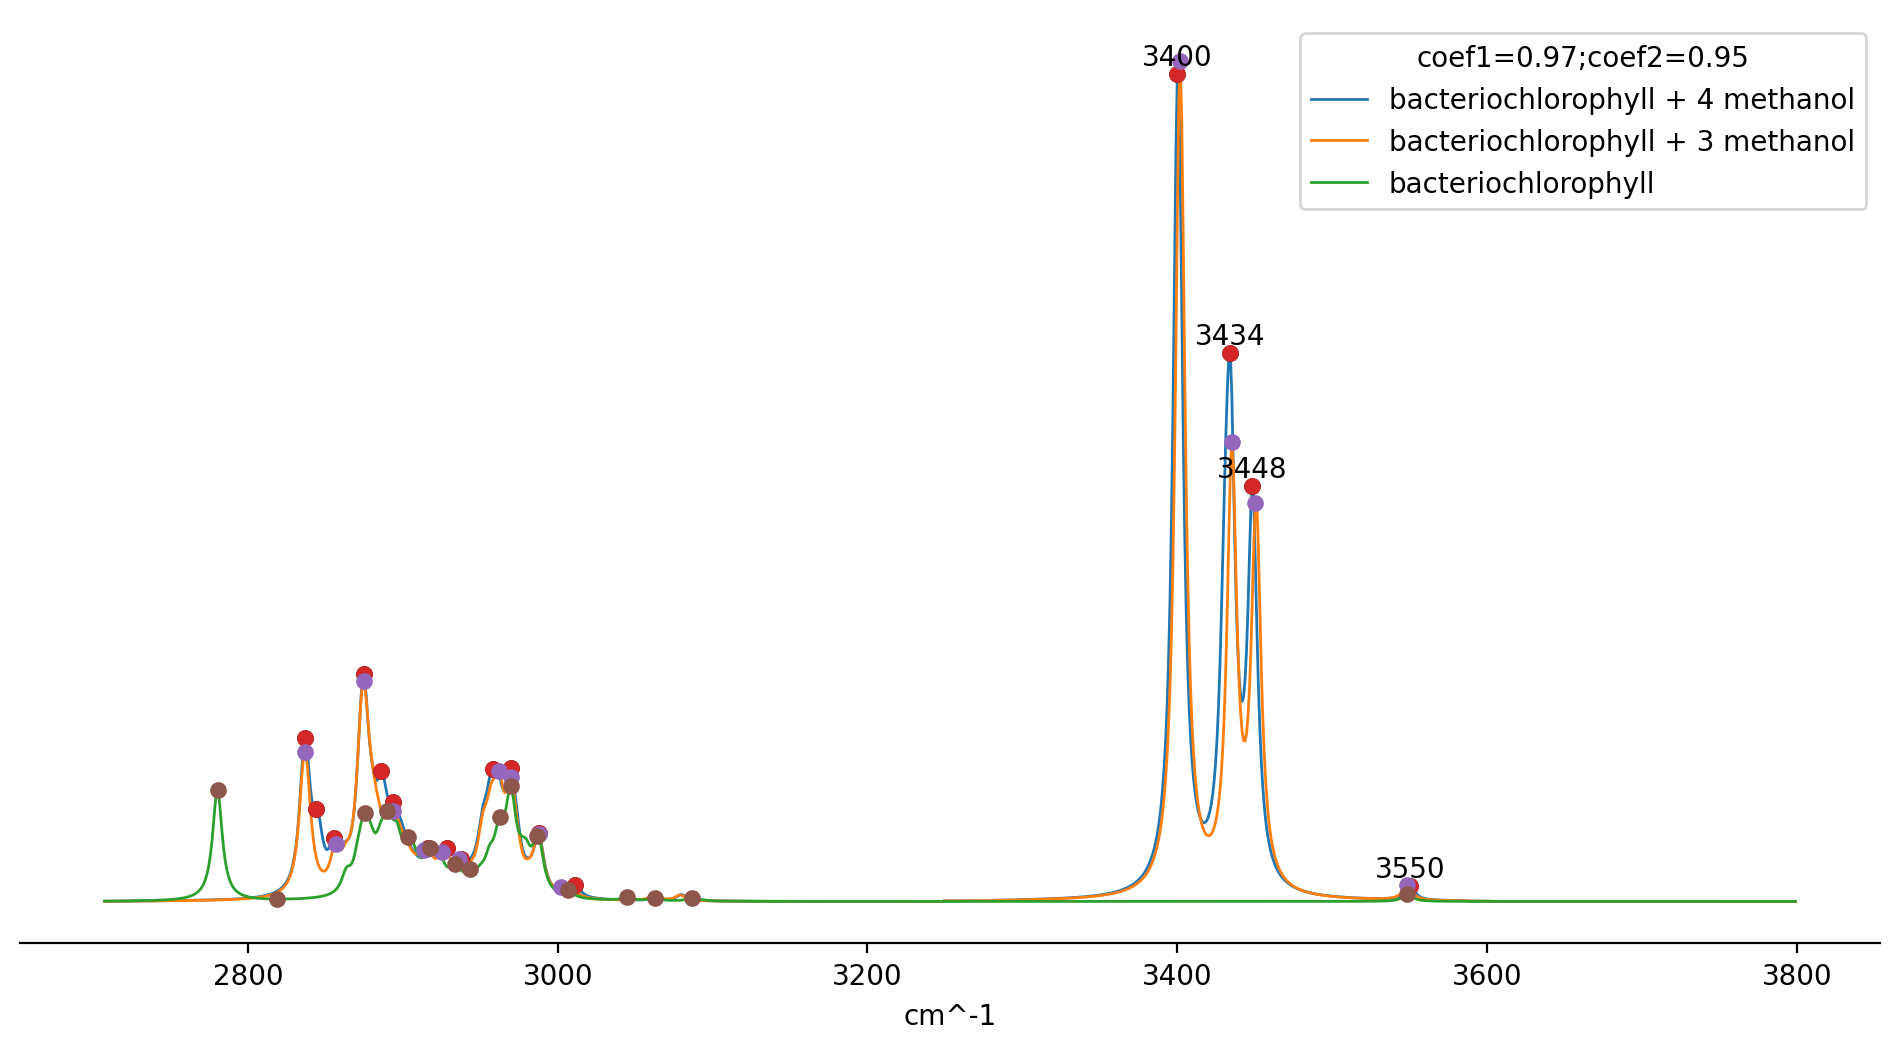

In [15]:
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 200
plot_all_short([b_4methanol, b_3methanol, b],
          ['bacteriochlorophyll + 4 methanol',
           'bacteriochlorophyll + 3 methanol',
           'bacteriochlorophyll'],
          coef1=coef1, coef2=coef2, y_shift=0, showPeaks=False, forcedFirstPeaks=True)

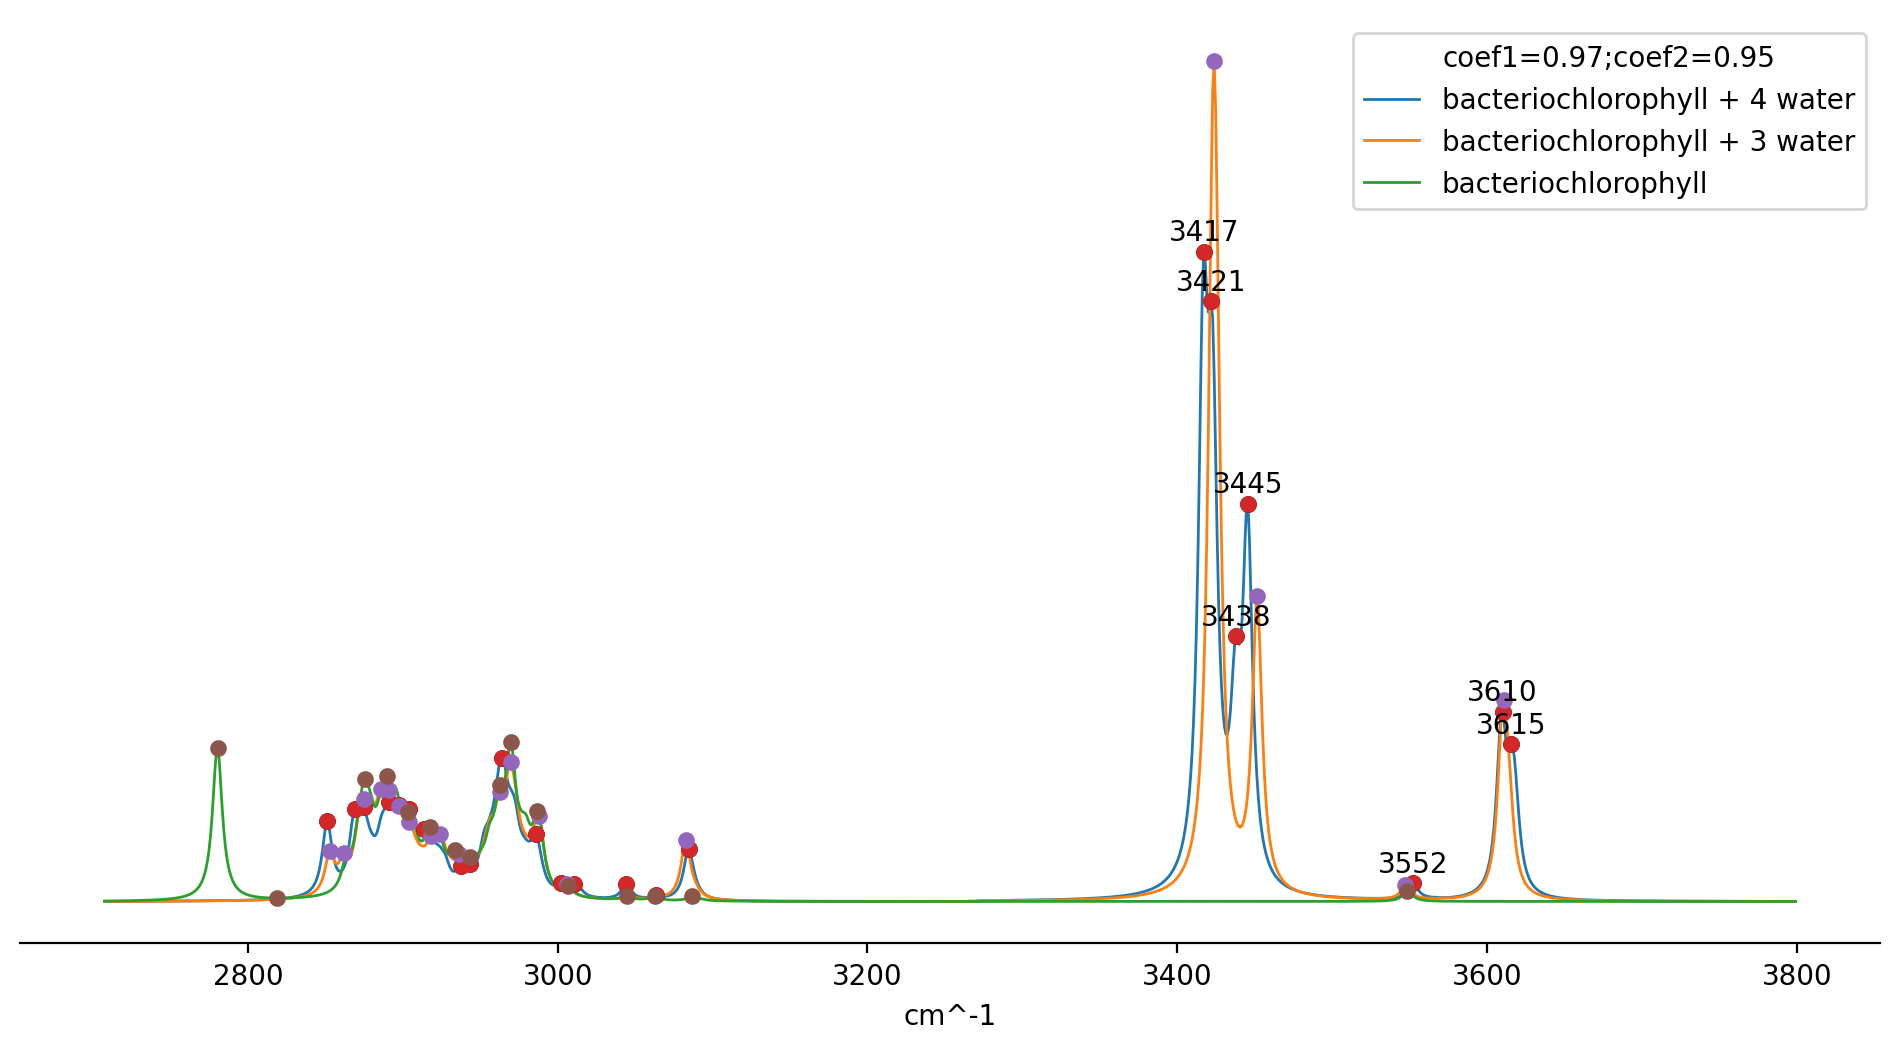

In [16]:
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 200
plot_all_short([b_4water,b_3water, b],
          ['bacteriochlorophyll + 4 water',
           'bacteriochlorophyll + 3 water',
           'bacteriochlorophyll'],
          coef1=coef1, coef2=coef2, y_shift=0, showPeaks=False, forcedFirstPeaks=True)

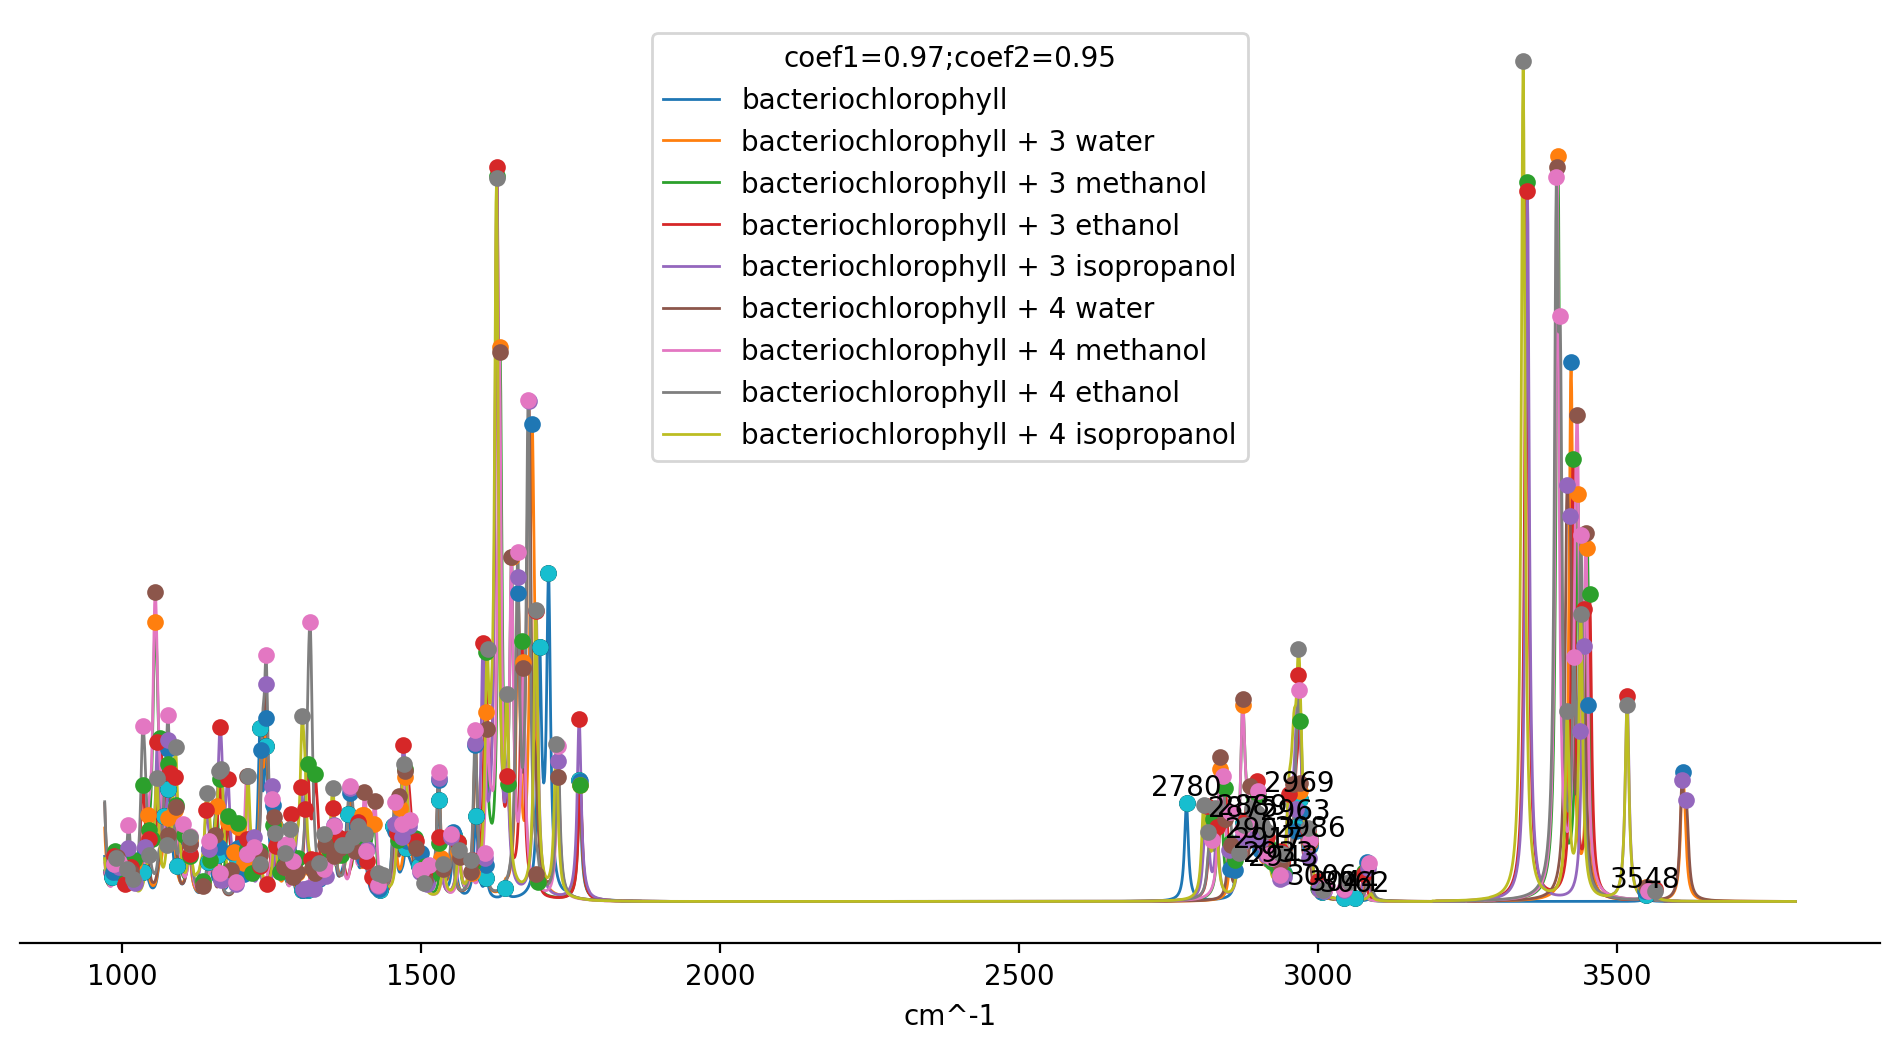

In [17]:

plot_all([b, b_3water, b_3methanol, b_3ethanol, b_3isopropanol, b_4water, b_4methanol, b_4ethanol, b_4isopropanol],
          ['bacteriochlorophyll',
           'bacteriochlorophyll + 3 water',
           'bacteriochlorophyll + 3 methanol',
           'bacteriochlorophyll + 3 ethanol',
           'bacteriochlorophyll + 3 isopropanol',
           'bacteriochlorophyll + 4 water',
           'bacteriochlorophyll + 4 methanol',
           'bacteriochlorophyll + 4 ethanol',
           'bacteriochlorophyll + 4 isopropanol'],
          coef1=coef1, coef2=coef2, y_shift=0, showPeaks=False)

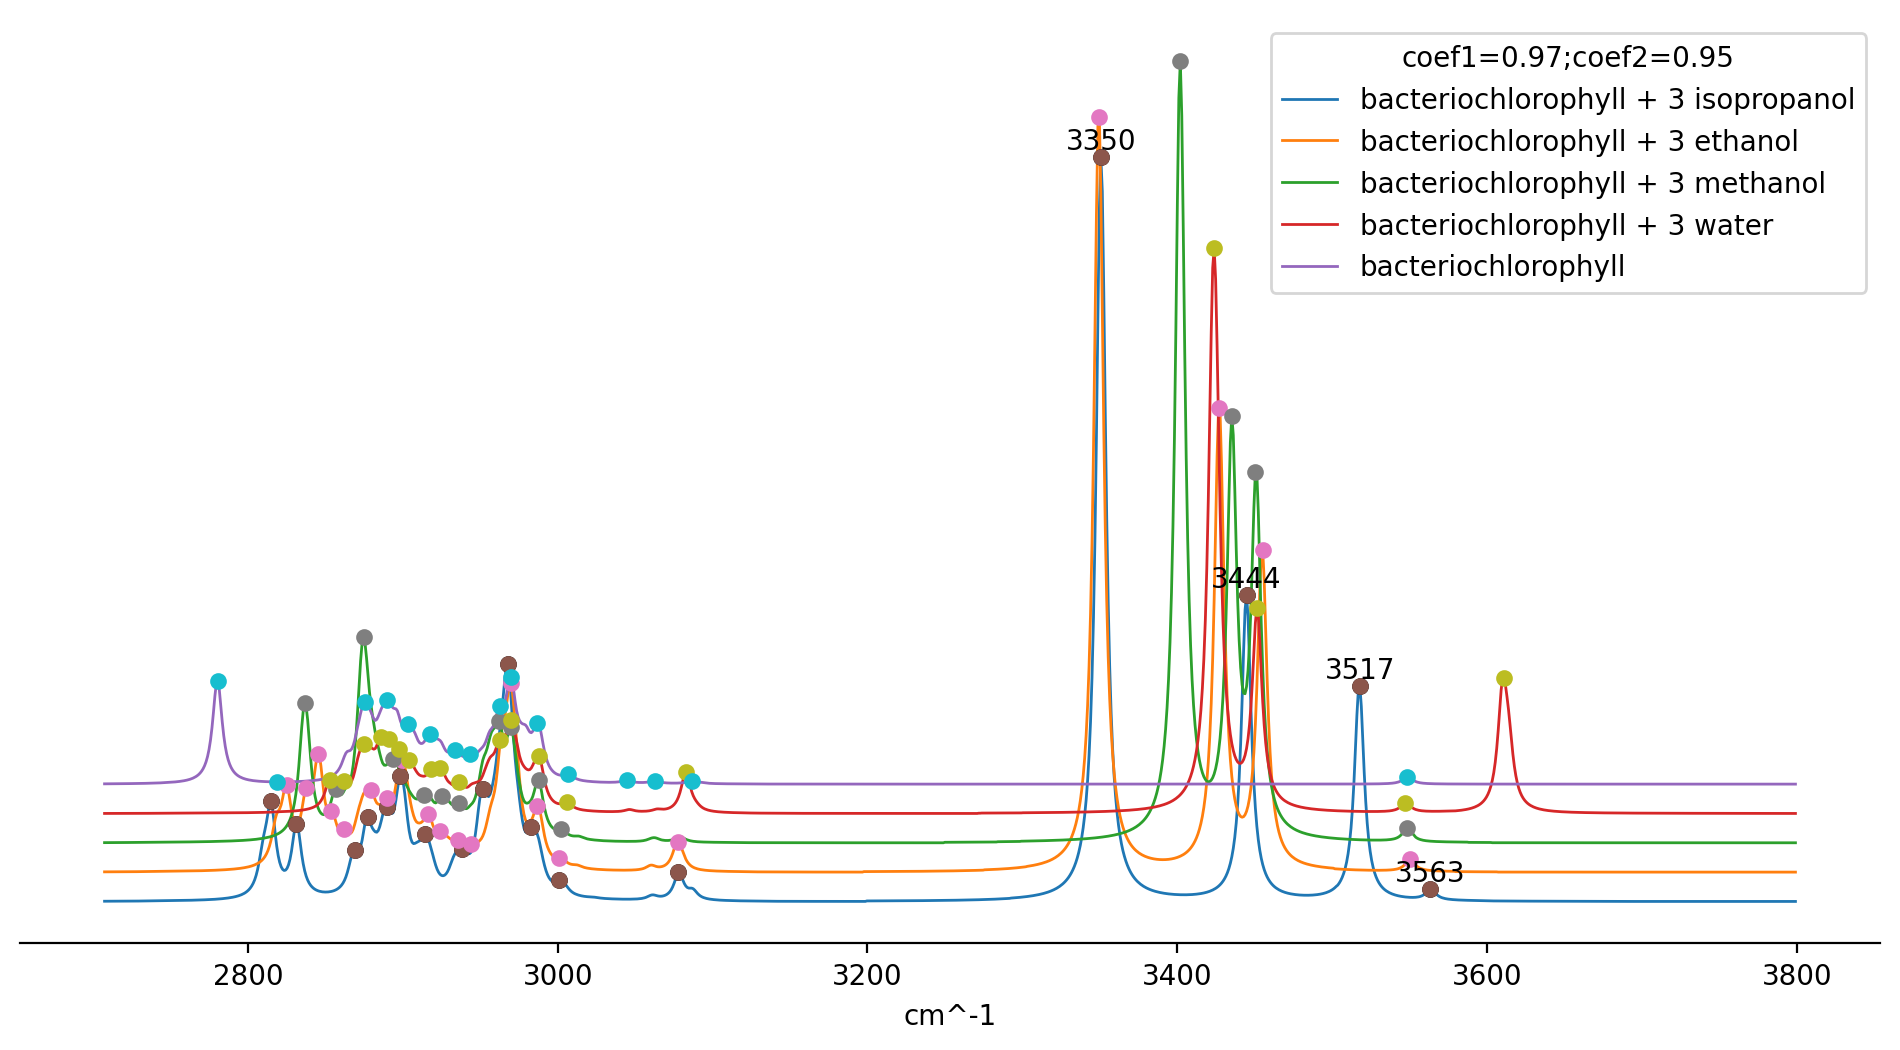

In [18]:
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 200
plot_all_short([b_3isopropanol, b_3ethanol, b_3methanol, b_3water, b],
          ['bacteriochlorophyll + 3 isopropanol',
           'bacteriochlorophyll + 3 ethanol',
           'bacteriochlorophyll + 3 methanol',
           'bacteriochlorophyll + 3 water',
           'bacteriochlorophyll'],
          coef1=coef1, coef2=coef2, y_shift=200, showPeaks=False, forcedFirstPeaks=True)

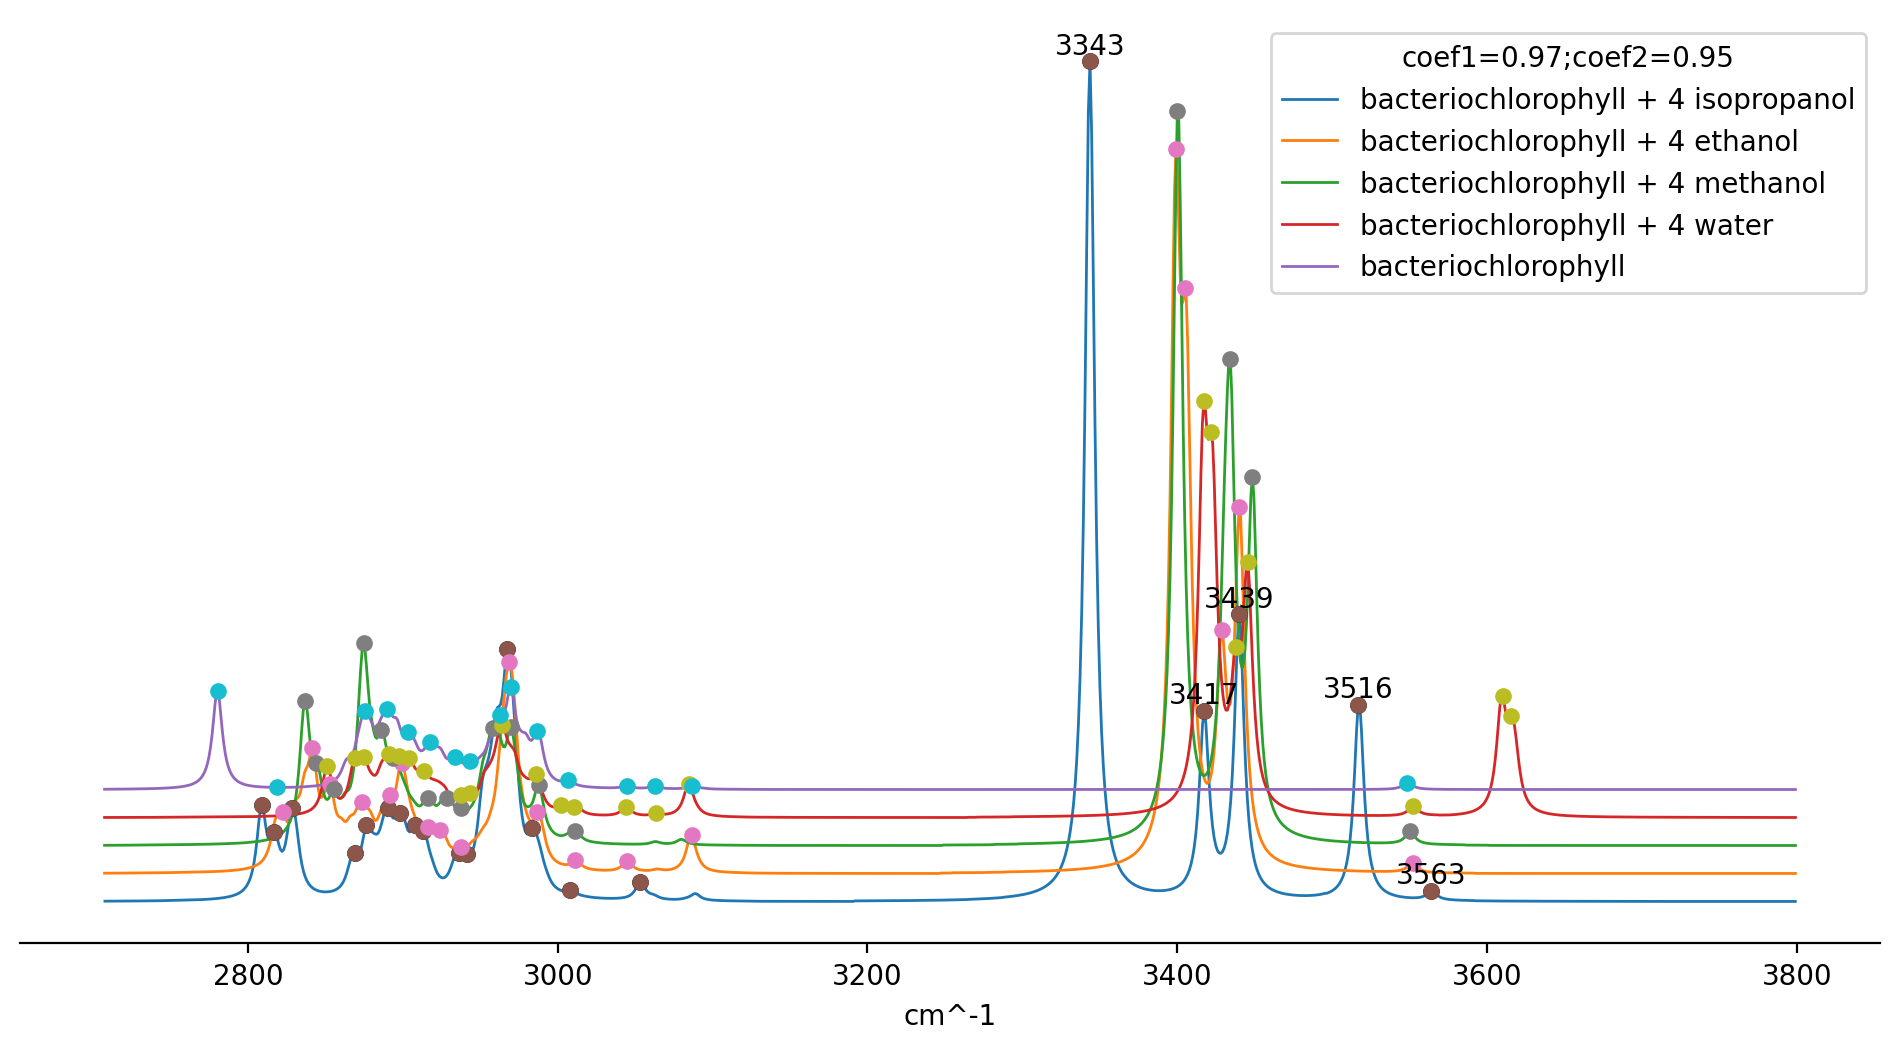

In [19]:
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 200
plot_all_short([b_4isopropanol, b_4ethanol, b_4methanol, b_4water, b], 
          ['bacteriochlorophyll + 4 isopropanol',
           'bacteriochlorophyll + 4 ethanol',
           'bacteriochlorophyll + 4 methanol',
           'bacteriochlorophyll + 4 water',
           'bacteriochlorophyll'],
           coef1=coef1, coef2=coef2, y_shift=200, showPeaks=False, forcedFirstPeaks=True)

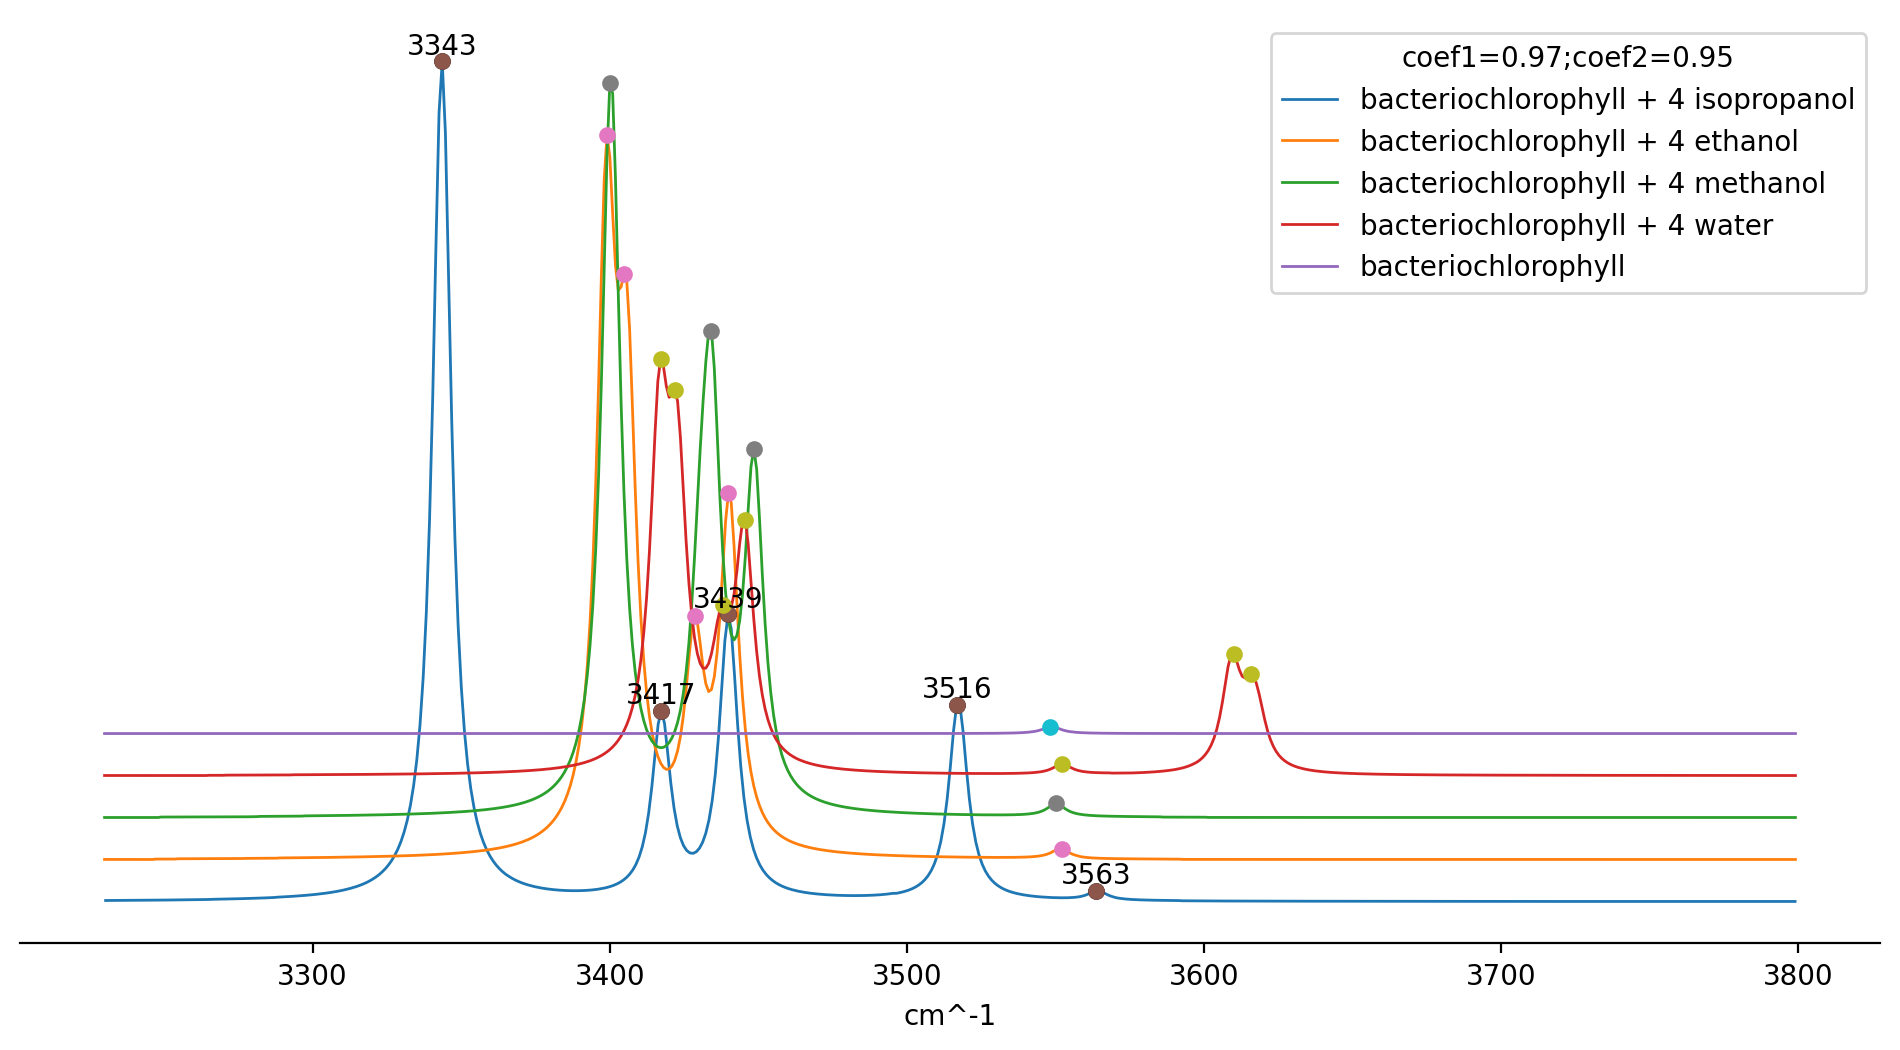

In [20]:
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 200
plot_all_ultra_short([b_4isopropanol, b_4ethanol, b_4methanol, b_4water, b], 
          ['bacteriochlorophyll + 4 isopropanol',
           'bacteriochlorophyll + 4 ethanol',
           'bacteriochlorophyll + 4 methanol',
           'bacteriochlorophyll + 4 water',
           'bacteriochlorophyll'],
           coef1=coef1, coef2=coef2, y_shift=300, showPeaks=False, forcedFirstPeaks=True)

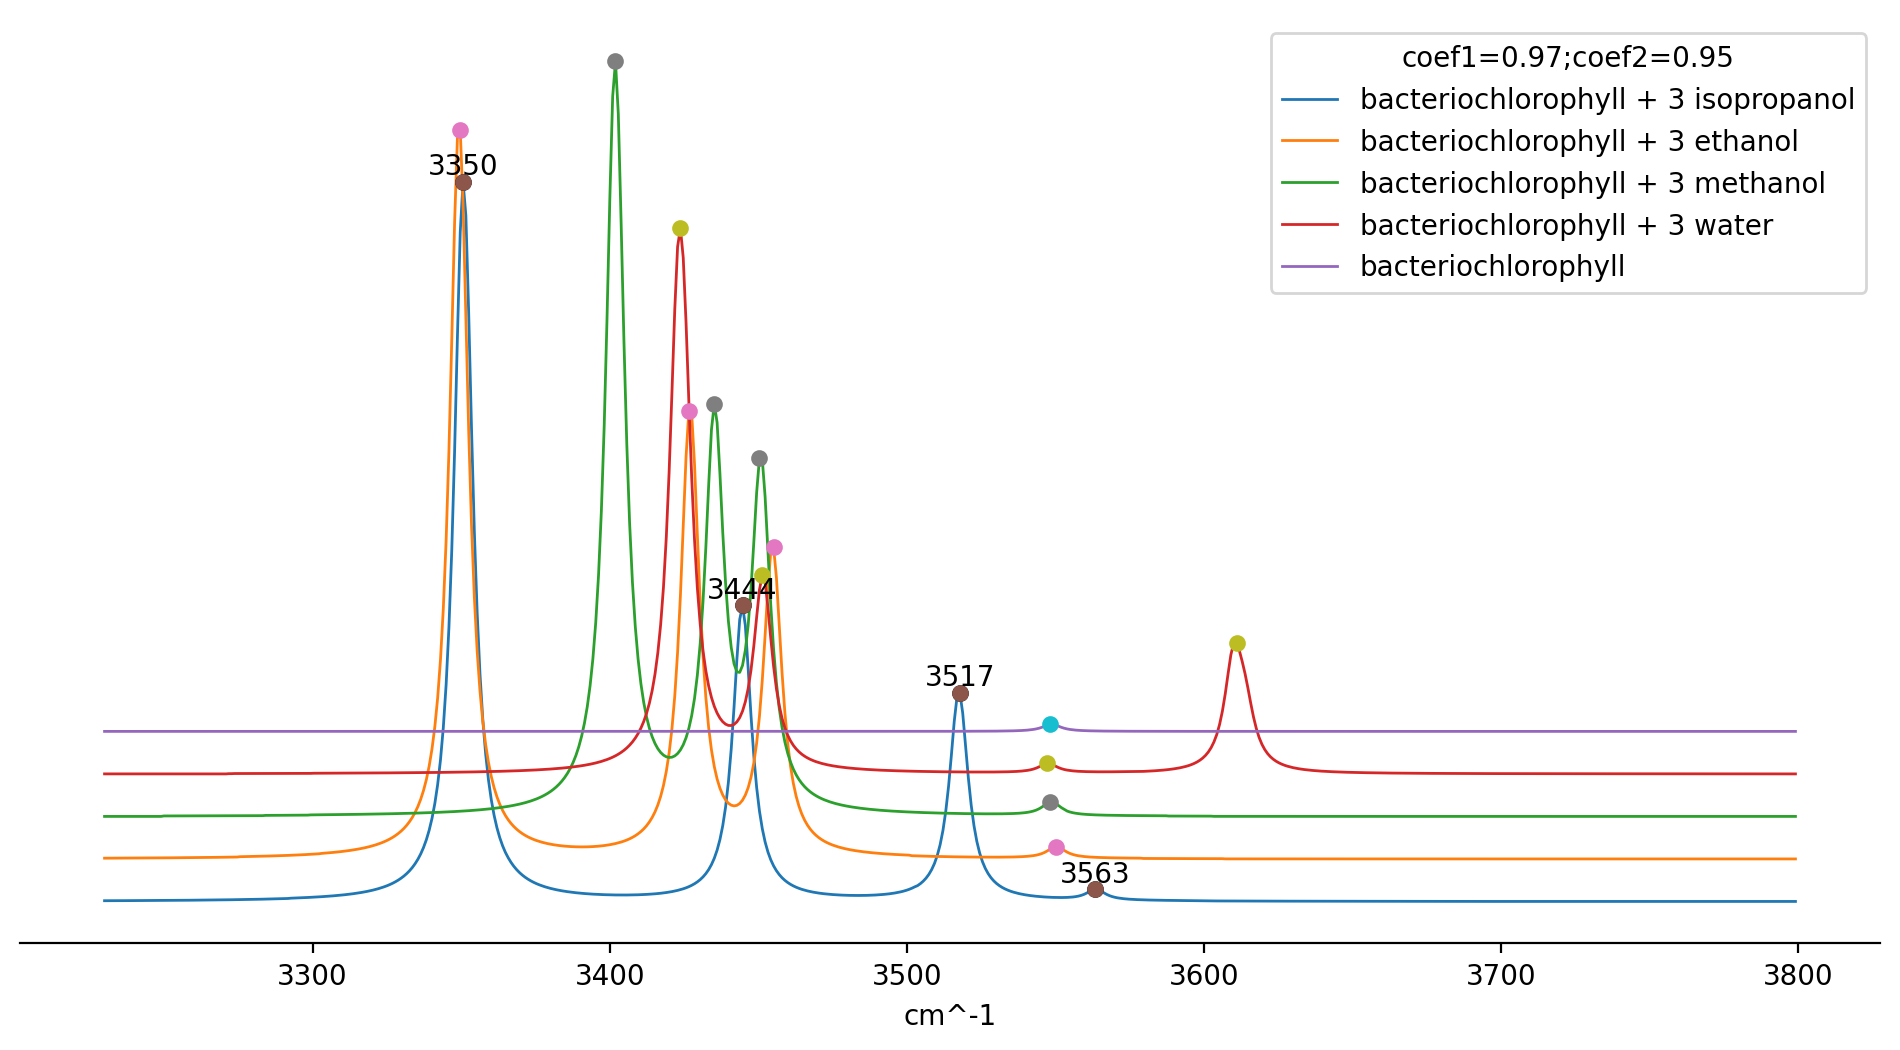

In [21]:
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 200
plot_all_ultra_short([b_3isopropanol, b_3ethanol, b_3methanol, b_3water, b],
          ['bacteriochlorophyll + 3 isopropanol',
           'bacteriochlorophyll + 3 ethanol',
           'bacteriochlorophyll + 3 methanol',
           'bacteriochlorophyll + 3 water',
           'bacteriochlorophyll'],
          coef1=coef1, coef2=coef2, y_shift=300, showPeaks=False, forcedFirstPeaks=True)

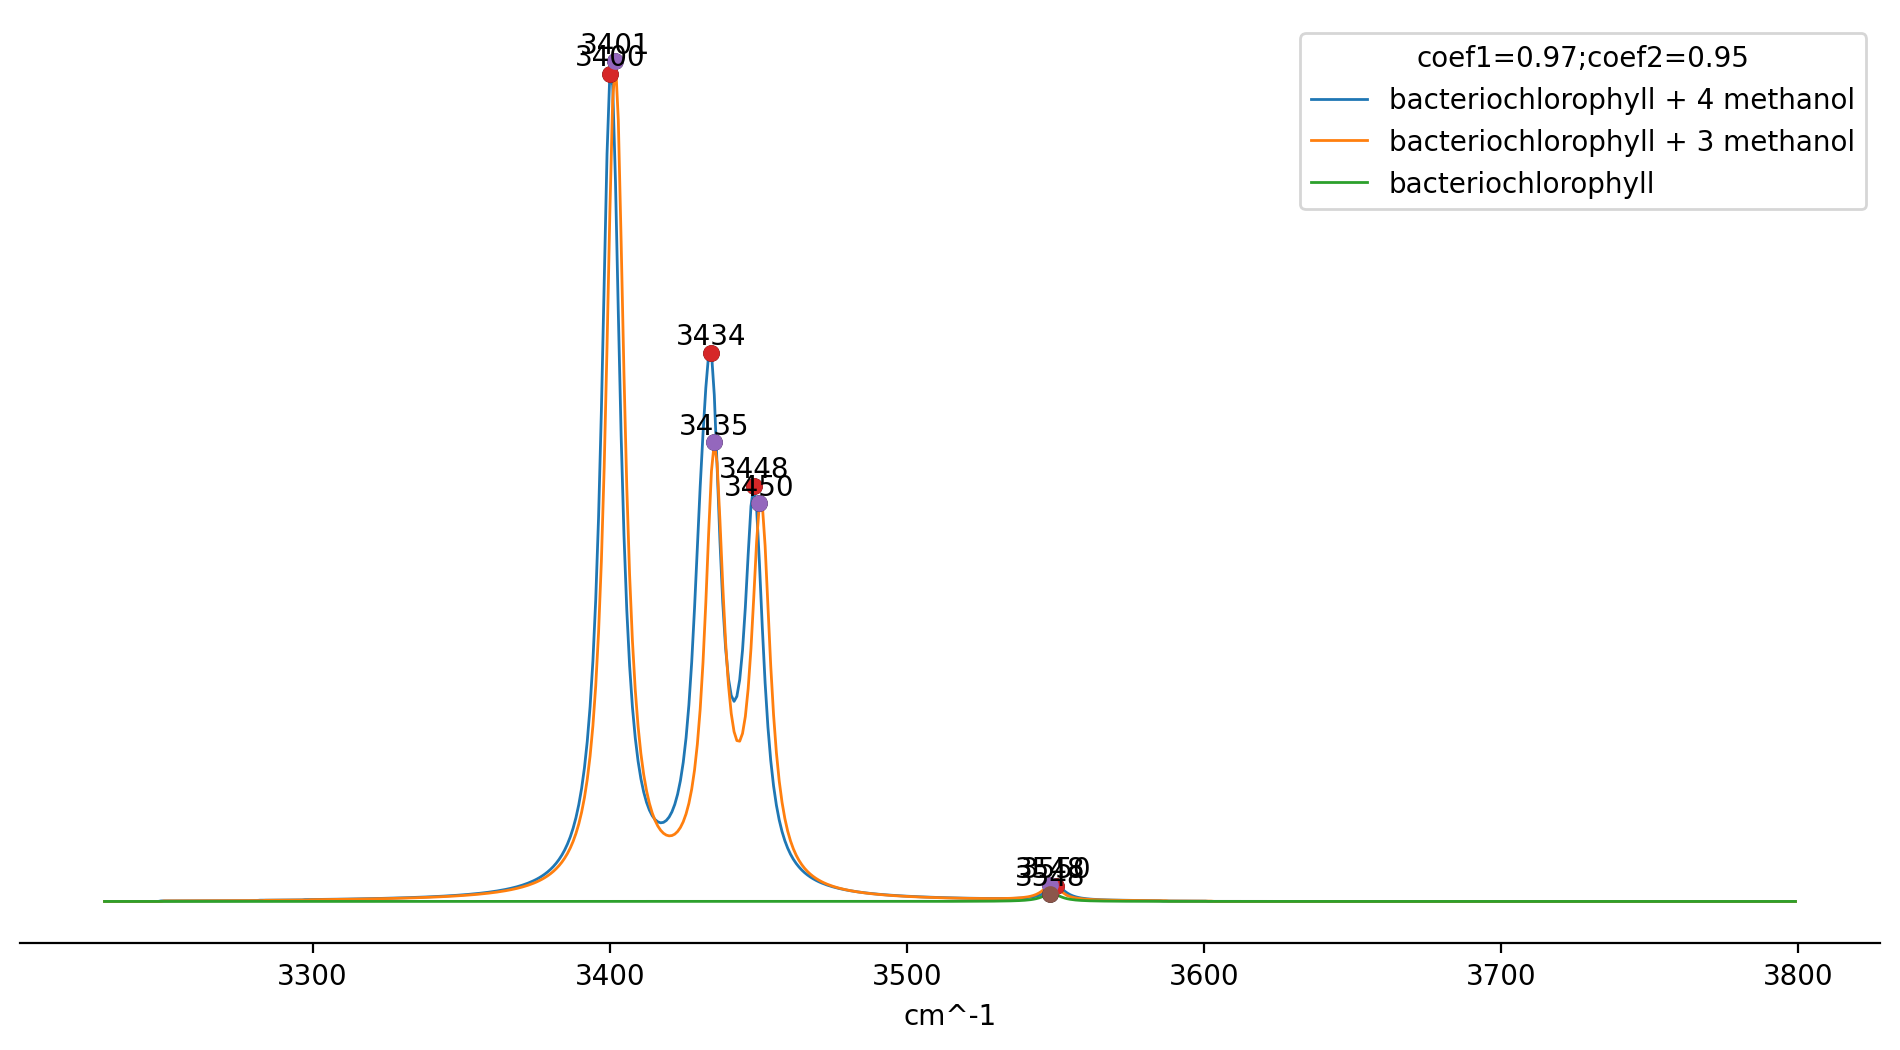

In [22]:
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 200
plot_all_ultra_short([b_4methanol, b_3methanol, b],
          ['bacteriochlorophyll + 4 methanol',
           'bacteriochlorophyll + 3 methanol',
           'bacteriochlorophyll'],
          coef1=coef1, coef2=coef2, y_shift=0, showPeaks=True, forcedFirstPeaks=True)

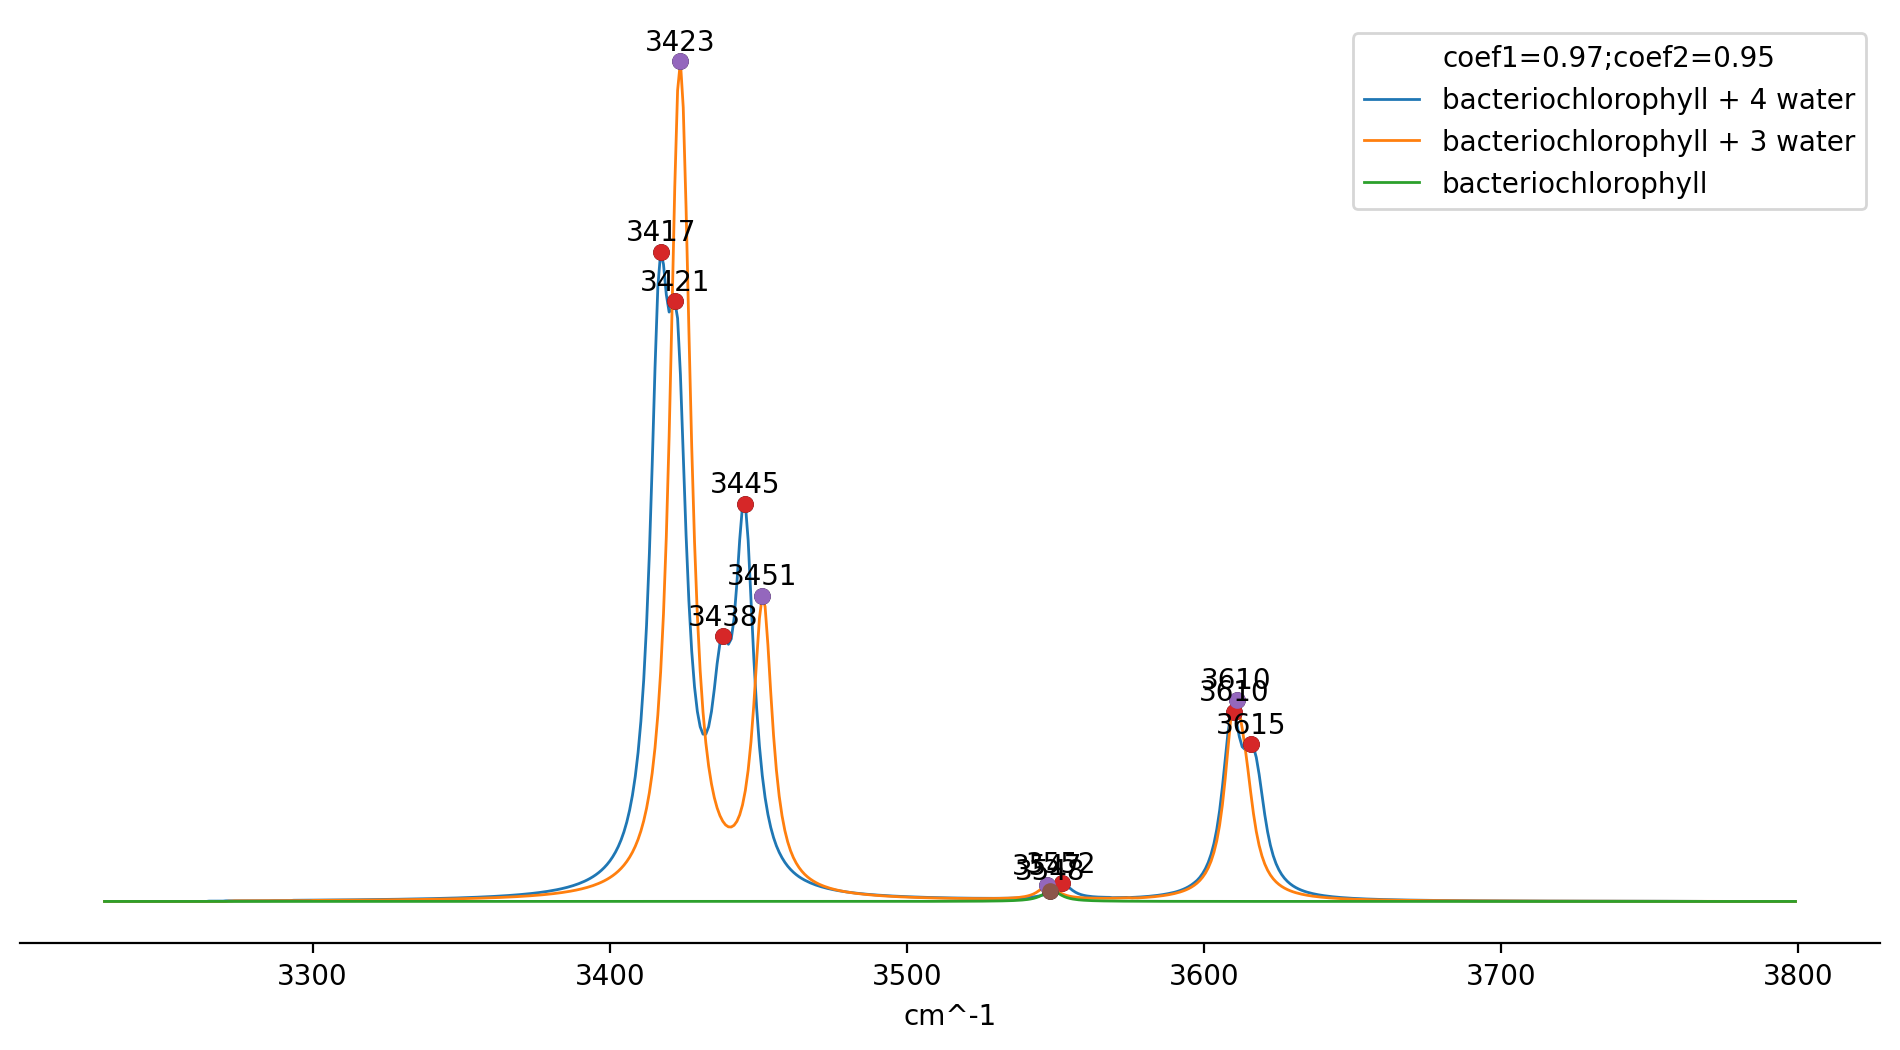

In [23]:
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 200
plot_all_ultra_short([b_4water,b_3water, b],
          ['bacteriochlorophyll + 4 water',
           'bacteriochlorophyll + 3 water',
           'bacteriochlorophyll'],
          coef1=coef1, coef2=coef2, y_shift=0, showPeaks=True, forcedFirstPeaks=True)

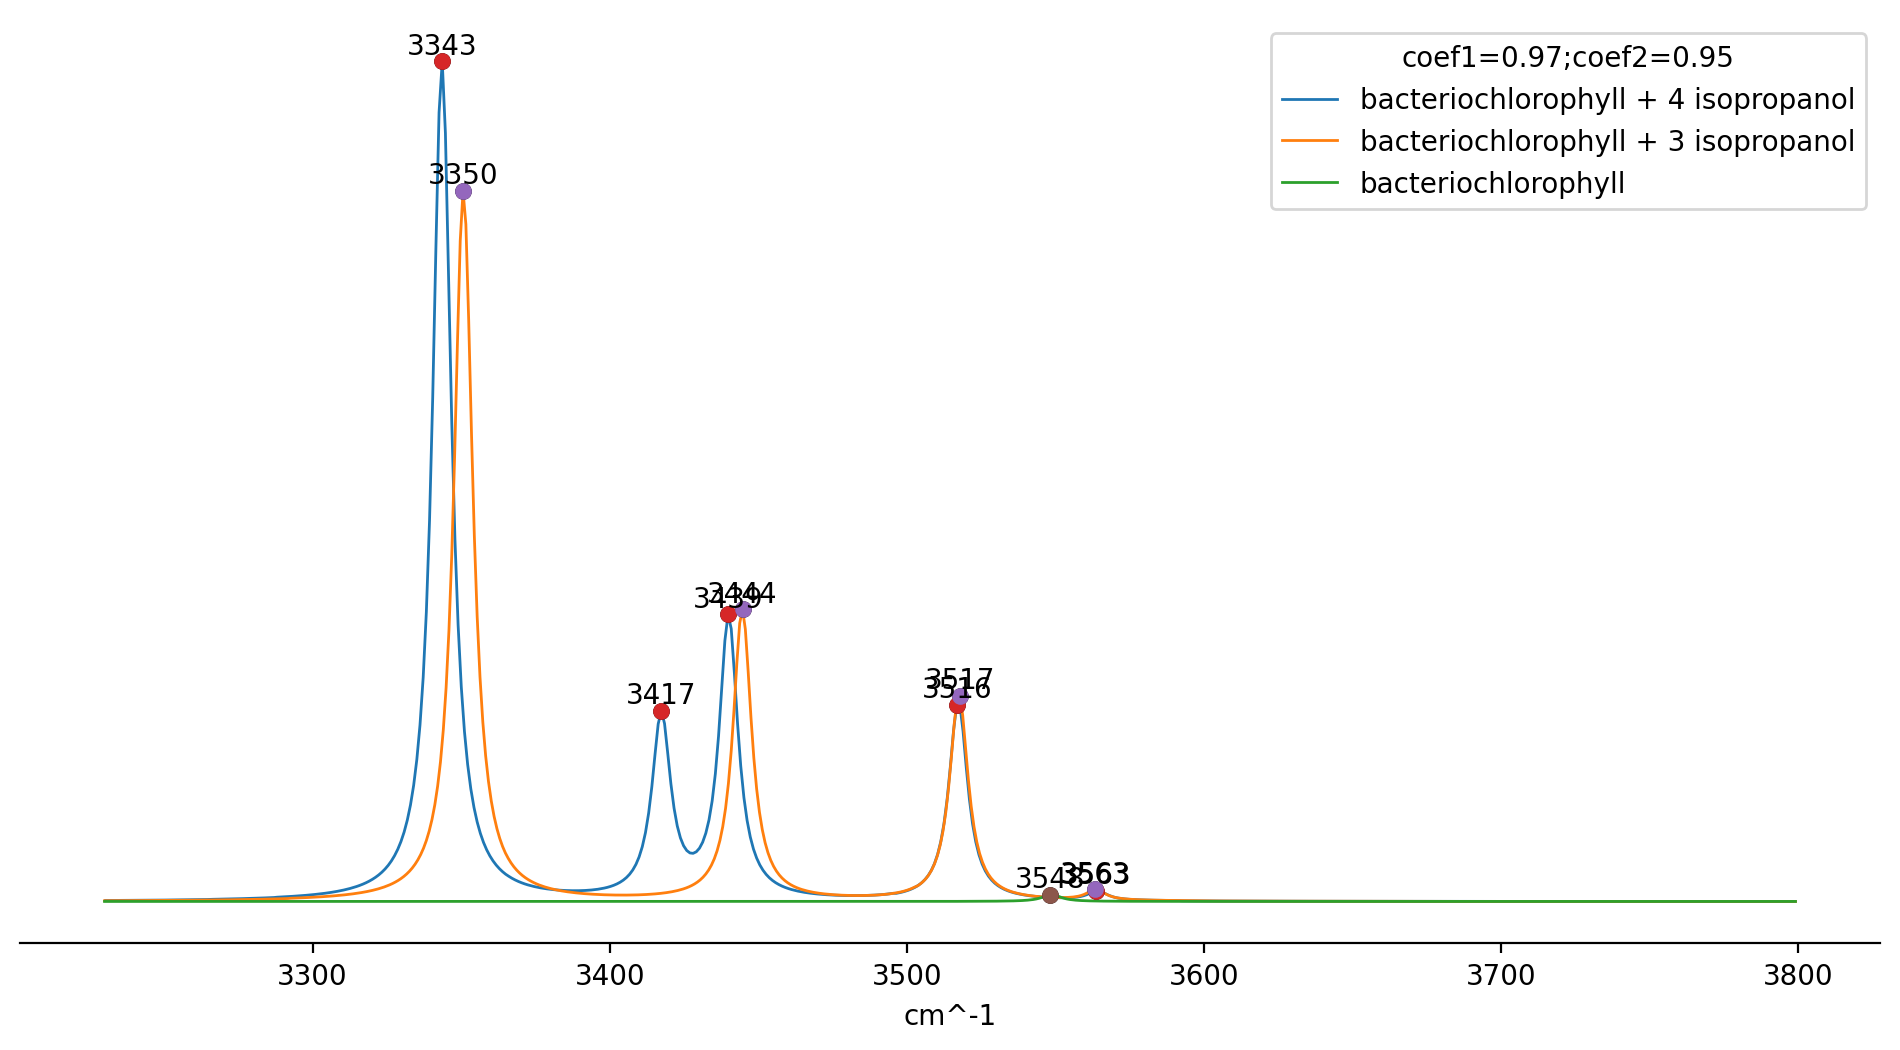

In [24]:
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 200
plot_all_ultra_short([b_4isopropanol, b_3isopropanol, b],
          ['bacteriochlorophyll + 4 isopropanol',
           'bacteriochlorophyll + 3 isopropanol',
           'bacteriochlorophyll'],
          coef1=coef1, coef2=coef2, y_shift=0, showPeaks=True, forcedFirstPeaks=True)

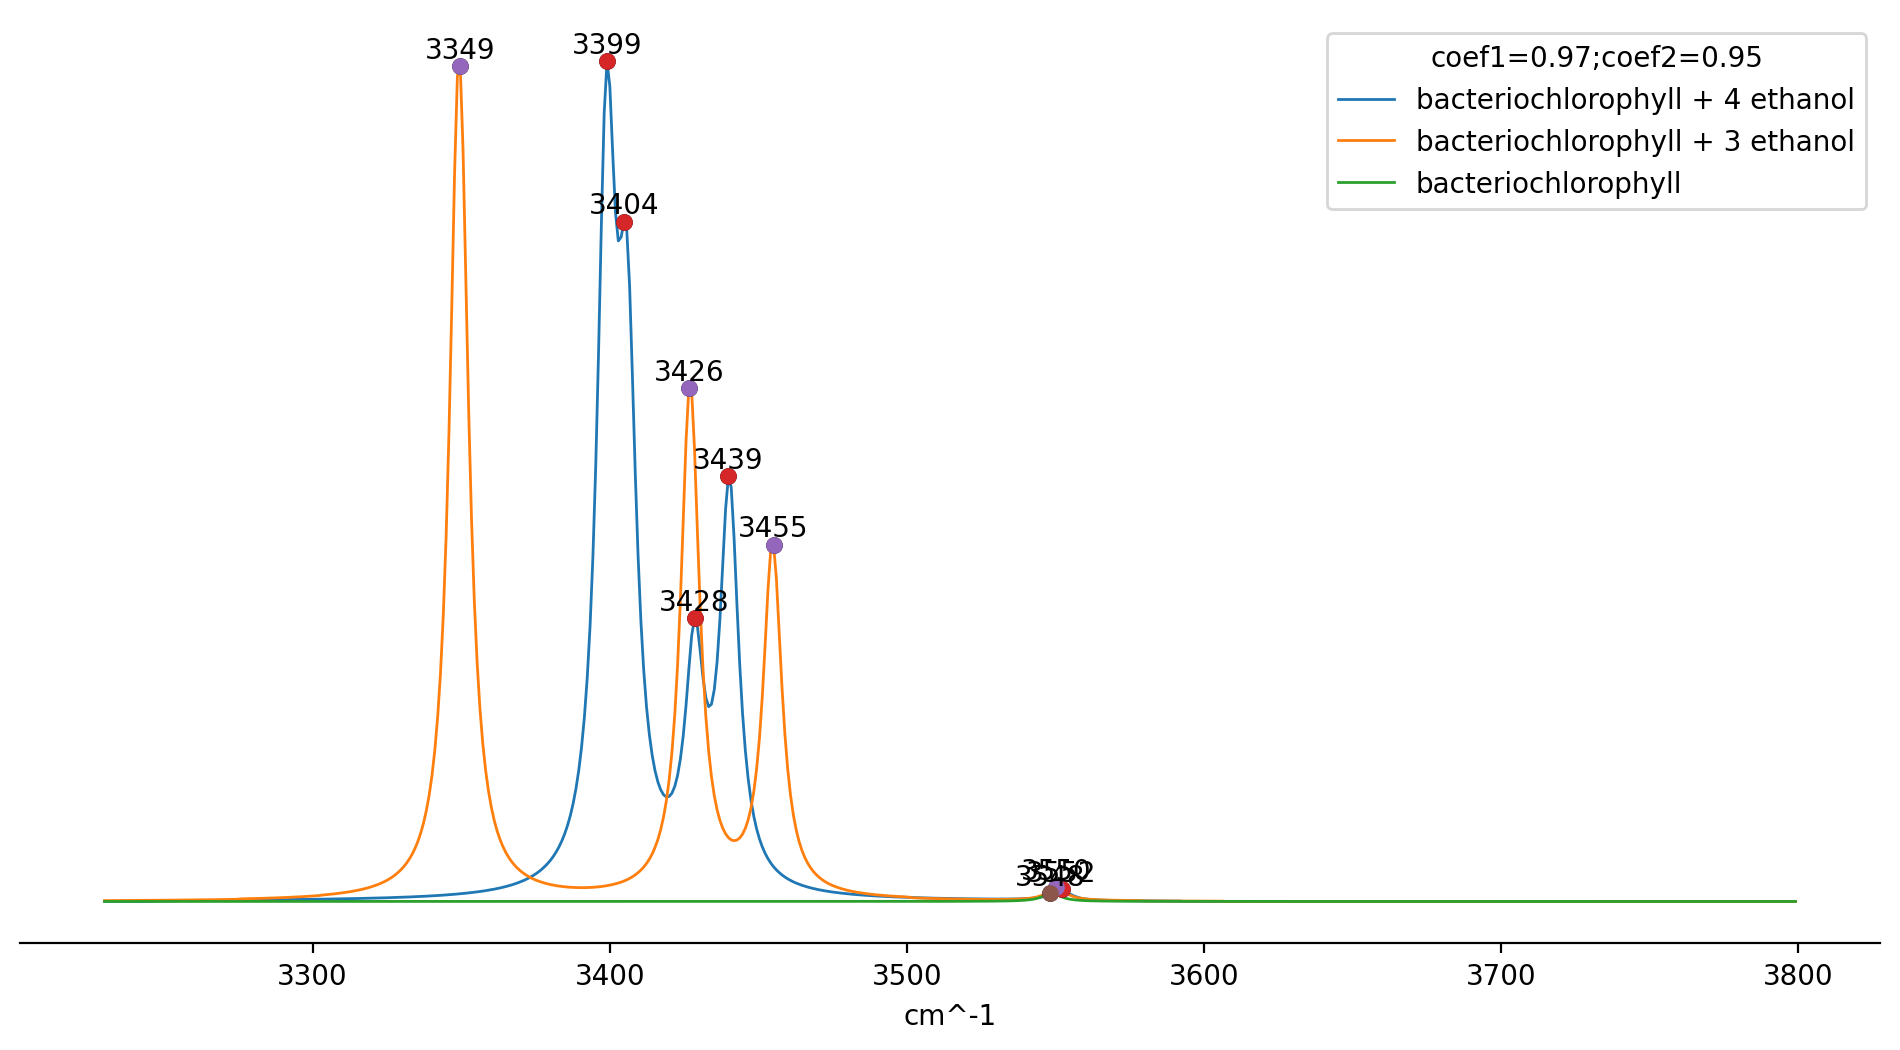

In [25]:
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 200
plot_all_ultra_short([b_4ethanol, b_3ethanol, b],
          ['bacteriochlorophyll + 4 ethanol',
           'bacteriochlorophyll + 3 ethanol',
           'bacteriochlorophyll'],
          coef1=coef1, coef2=coef2, y_shift=0, showPeaks=True, forcedFirstPeaks=True)
